# Research on the "Streamchik" online game store's sales worldwide.
We have data on the sales of games from the "Streamchik" online store for several years. The data should include information on game sales, user and expert ratings, genres, and platforms (for example, Xbox or PlayStation). The dataset will include the abbreviation ESRB (Entertainment Software Rating Board) — an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, such as "For Adults," "For Early Childhood," or "For Teens." Data description:

- Name — game title
- Platform — platform
- Year_of_Release — year of release
- Genre — game genre
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critic score (maximum 100)
- User_Score — user score (maximum 10)
- Rating — rating from the ESRB organization. This association determines the rating of computer games and assigns them a suitable age category.

__Main research hypotheses:__

- The average user ratings for Xbox One and PC platforms are the same;
- The average user ratings for Action and Sports genres are different.

__Research process:__

- Using data from the '/datasets/games.csv' file, the data quality will be determined first.
- Data preprocessing, error correction, filling in missing values, or removing anomalous values.
- Data merging for research purposes.
- Data analysis and calculation of key parameters.
- Testing the main hypotheses.
- Conclusions based on the analysis.


## Data loading:

Add all the libraries needed for this research.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extracting the data, let's immediately display information about them to understand that the data has been successfully extracted.

In [2]:
games = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/games.csv')
display(games)
print(games.describe())
print(games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries

At first glance, we have high-quality data at our disposal, with a small number of missing values in the columns with ratings. We will check them during the preprocessing stage.

## Data preprocessing.

1. Let's convert all columns to lowercase.
2. Convert the 'year_of_release' column to the date typeю
3. Also, clean up the 'genre' column. The number of missing values in it is not critical, and replacing this type of data is not feasible.
4. Replace empty values in the 'rating' column with the value 'n/a'.

In [3]:
# Convert all columns to lowercase
games.columns = games.columns.str.lower()

# Convert the 'year_of_release' column to the date type
# First, let's get rid of the missing values in the column; their amount is small and not critical for subsequent analysis.
games.dropna(subset=['year_of_release'], inplace=True)
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = games['year_of_release'].dt.year

# Remove missing values in the 'genre' column
games.dropna(subset=['genre'], inplace=True)

# Convert the 'user_score' column to the float64 type, replacing 'tbd' (to be determined) values with NaN
# for ease of conversion to float64.
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Replace missing values in the 'rating' column with 'n/a'
games['rating'].fillna('n/a', inplace=True)

# Display the processed data
display(games)

# Display the percentage of missing values in each column after preprocessing
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,n/a
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,n/a
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,n/a
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,n/a
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/a
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,n/a


,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


The missing data from the columns 'year of release' and 'genre' were decided to be deleted because leaving them blank was not possible, and replacing them with other values was not feasible.

Let's check the columns for obvious duplicates.

In [4]:
print(games.duplicated().sum())

0


Check the table for outliers and anomalous values. Let's create a boxplot and histogram for each column.

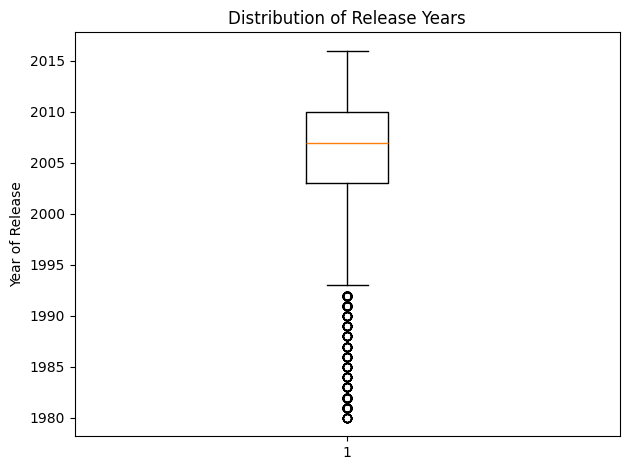

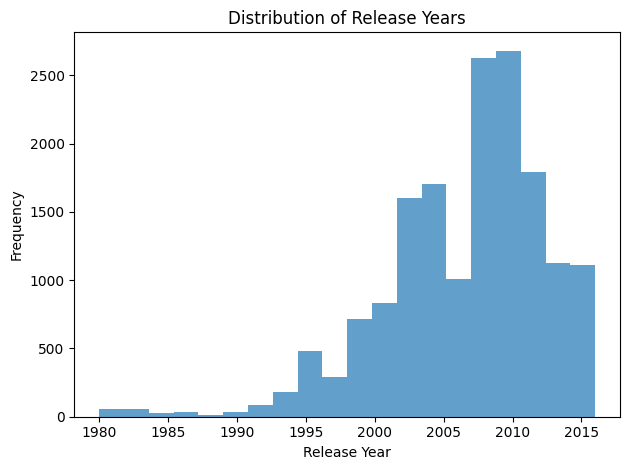

In [5]:
plt.boxplot(games['year_of_release'])
plt.ylabel('Year of Release')
plt.title('Distribution of Release Years')
plt.tight_layout()
plt.show()

plt.hist(games['year_of_release'], bins=20, alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.tight_layout()
plt.show()

_Conclusion_: The column of release years contains only relevant data for game releases from 1980 to 2016. The majority of the data is concentrated between the years 2000 and 2015.

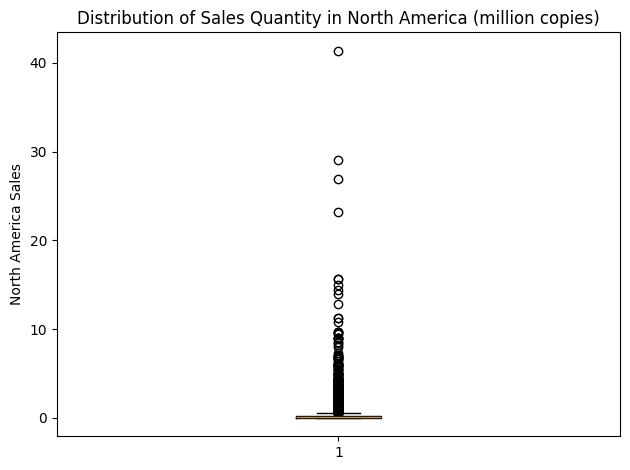

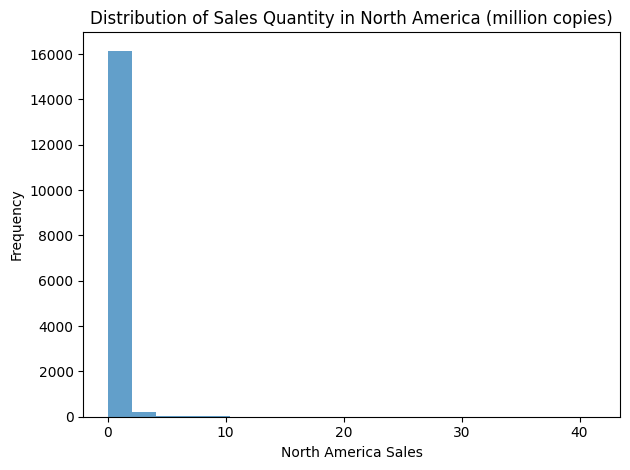

In [6]:
plt.boxplot(games['na_sales'])
plt.ylabel('North America Sales')
plt.title('Distribution of Sales Quantity in North America (million copies)')
plt.tight_layout()
plt.show()

plt.hist(games['na_sales'], bins=20, alpha=0.7)
plt.xlabel('North America Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity in North America (million copies)')
plt.tight_layout()
plt.show()

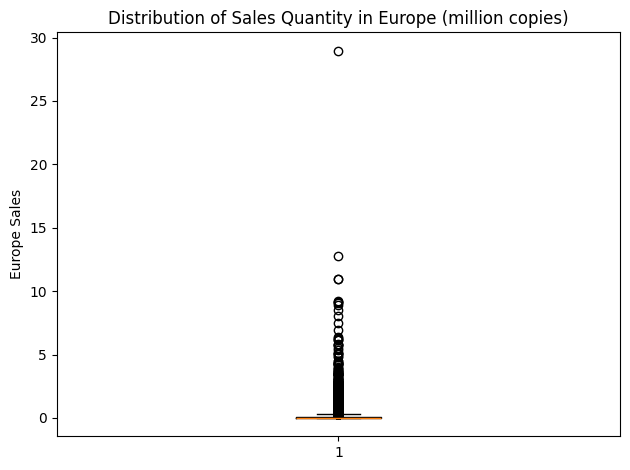

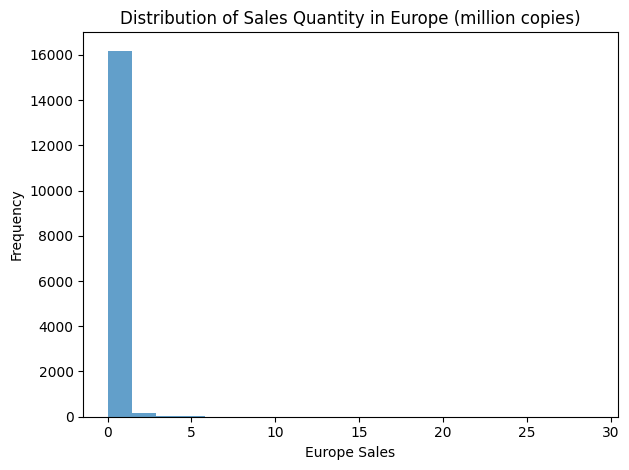

In [7]:
plt.boxplot(games['eu_sales'])
plt.ylabel('Europe Sales')
plt.title('Distribution of Sales Quantity in Europe (million copies)')
plt.tight_layout()
plt.show()

plt.hist(games['eu_sales'], bins=20, alpha=0.7)
plt.xlabel('Europe Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity in Europe (million copies)')
plt.tight_layout()
plt.show()

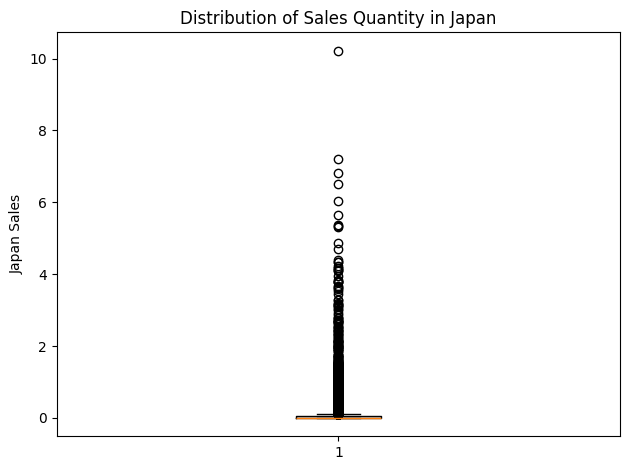

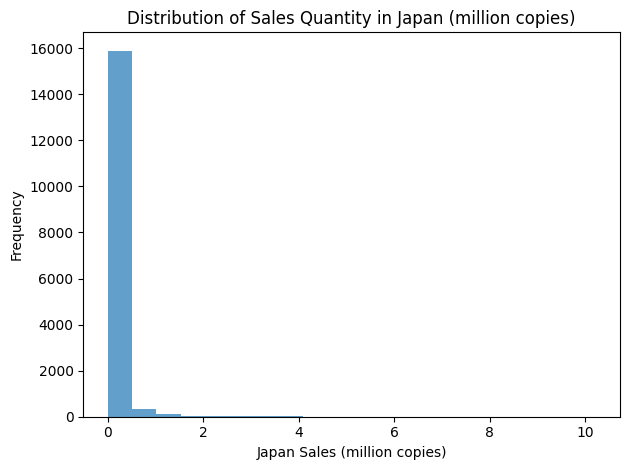

In [8]:
plt.boxplot(games['jp_sales'])
plt.ylabel('Japan Sales')
plt.title('Distribution of Sales Quantity in Japan')
plt.tight_layout()
plt.show()

plt.hist(games['jp_sales'], bins=20, alpha=0.7)
plt.xlabel('Japan Sales (million copies)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity in Japan (million copies)')
plt.tight_layout()
plt.show()

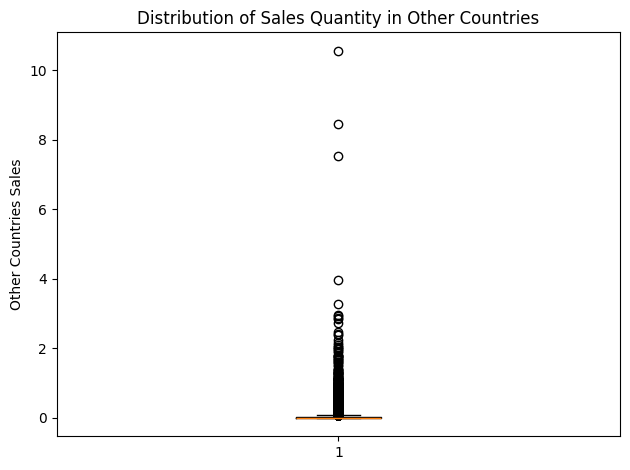

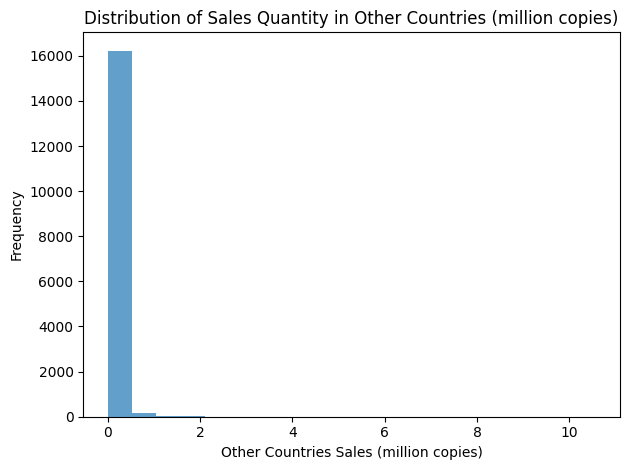

In [9]:
plt.boxplot(games['other_sales'])
plt.ylabel('Other Countries Sales')
plt.title('Distribution of Sales Quantity in Other Countries')
plt.tight_layout()
plt.show()

plt.hist(games['other_sales'], bins=20, alpha=0.7)
plt.xlabel('Other Countries Sales (million copies)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity in Other Countries (million copies)')
plt.tight_layout()
plt.show()

_Conclusion_: Sales data has many values close to zero, which is due to the counting being in million copies of games sold.

Next, let's also check the columns with ratings for outliers.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


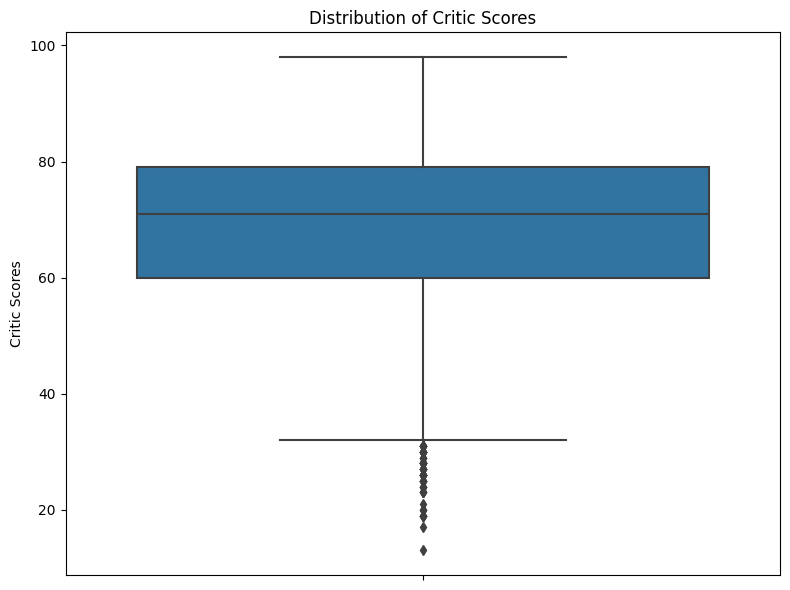

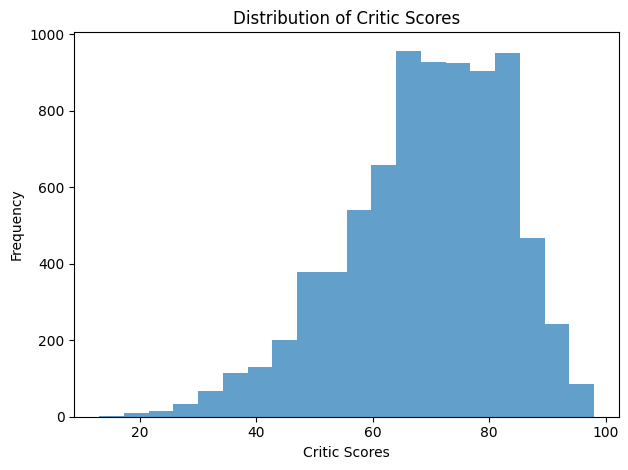

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=games, y='critic_score')
plt.ylabel('Critic Scores')
plt.title('Distribution of Critic Scores')
plt.tight_layout()
plt.show()

plt.hist(games['critic_score'], bins=20, alpha=0.7)
plt.xlabel('Critic Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Critic Scores')
plt.tight_layout()
plt.show()

games['critic_score'].describe()

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


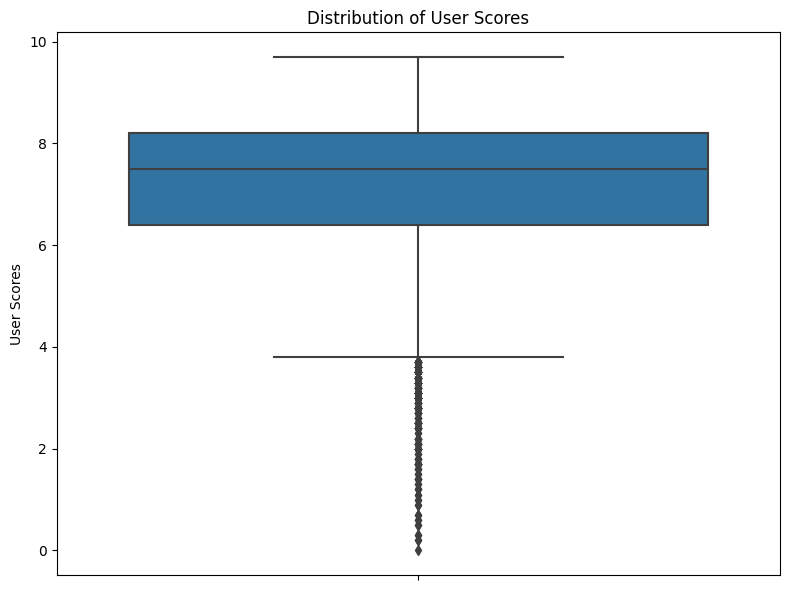

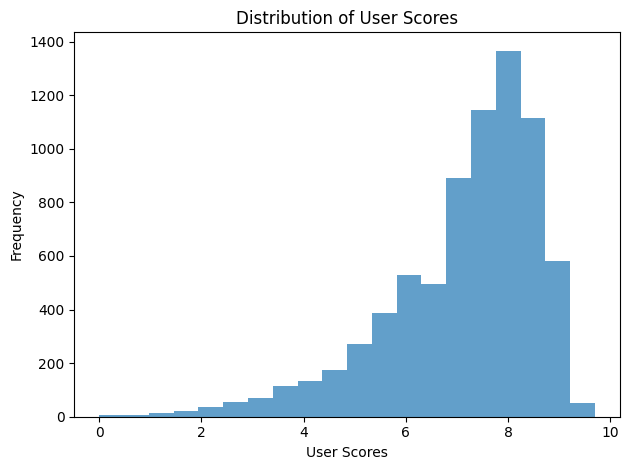

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=games, y='user_score')
plt.ylabel('User Scores')
plt.title('Distribution of User Scores')
plt.tight_layout()
plt.show()

plt.hist(games['user_score'], bins=20, alpha=0.7)
plt.xlabel('User Scores')
plt.ylabel('Frequency')
plt.title('Distribution of User Scores')
plt.tight_layout()
plt.show()

games['user_score'].describe()

_Conclusion_: Overall, the obtained plots indicate that the available data align with the specified original conditions. Critic scores are distributed from 40 to 95, and scores below 40 are outliers, as expected in reality. User scores range from 4 to 9.5, and scores below 4, similar to critic scores, are considered outliers.

Let's calculate the total sales data for each region and add them to a separate column called 'total_sales'.

In [12]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,n/a,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,n/a,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,n/a,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,n/a,0.01


After conducting the analysis, it was found that the sales columns are fully populated, which will be beneficial for subsequent analysis. Critic and user scores do not exhibit anomalous outliers; everything falls within acceptable ranges. Such data is suitable for analysis and drawing conclusions that are close to reality.

## Conducting Exploratory Data Analysis.

Let's examine how many games were released in different years.

In [13]:
grouped_years = games.groupby("year_of_release")['name'].count()
display(grouped_years)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

For visual clarity, let's create a histogram.

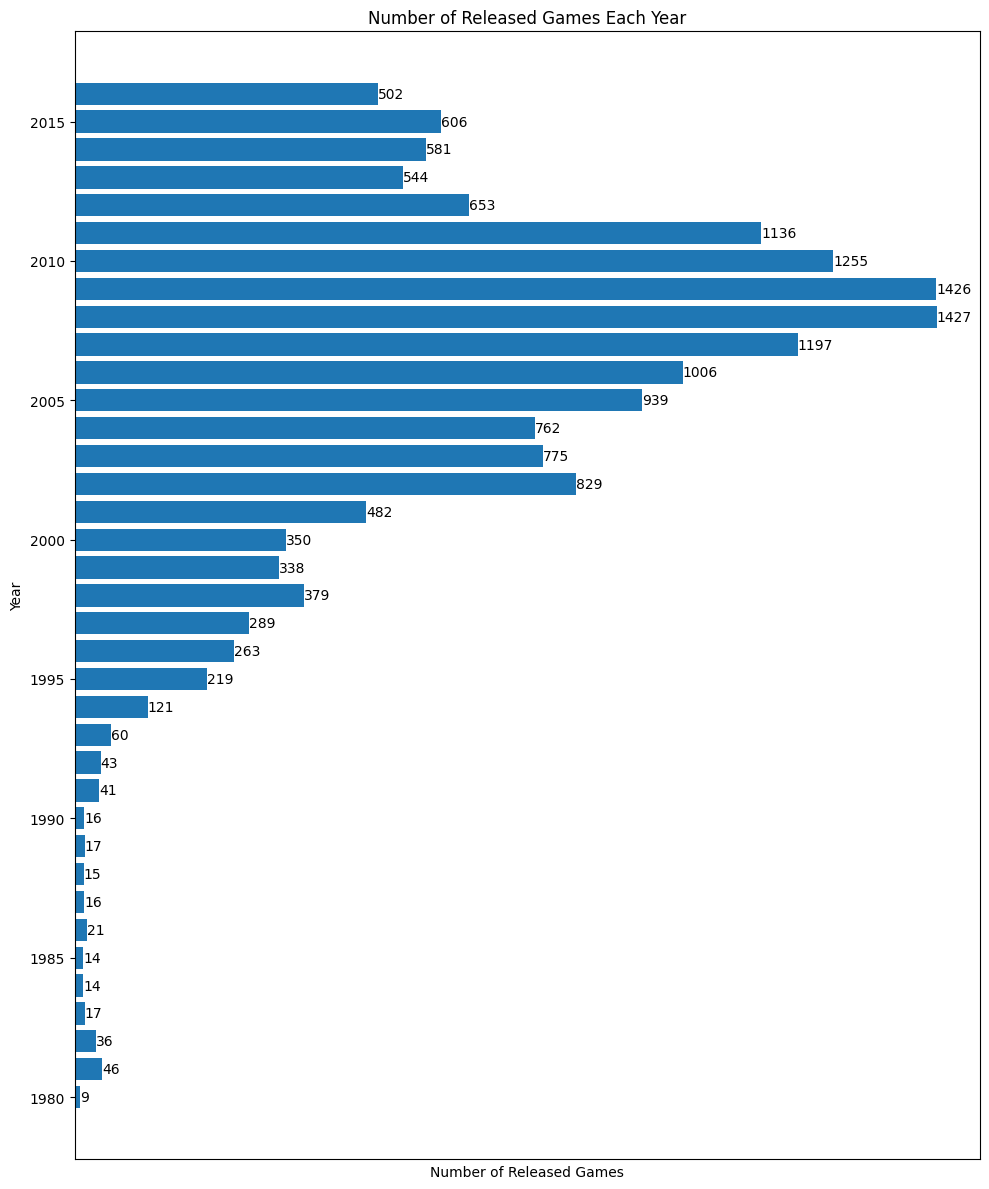

In [14]:
plt.figure(figsize=(10, 12))
bars = plt.barh(grouped_years.index, grouped_years.values)
plt.xlabel('Number of Released Games')
plt.ylabel('Year')
plt.title('Number of Released Games Each Year')

plt.xticks([])

for bar, value in zip(bars, grouped_years.values):
    plt.text(value, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

From this histogram, we can observe the emergence of the computer game industry from 1980 to 1995, its rise from 1995 to 2000, and the attainment of peak values from 2000 to 2010. During this period, the market experienced unprecedented growth, followed by a gradual stabilization by 2015.

Let's now explore how sales have changed across platforms. We'll select platforms with the highest total sales and plot their distribution over the years.

In [15]:
print(games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


Let's create a plot to visualize the total sales of each platform over the years.

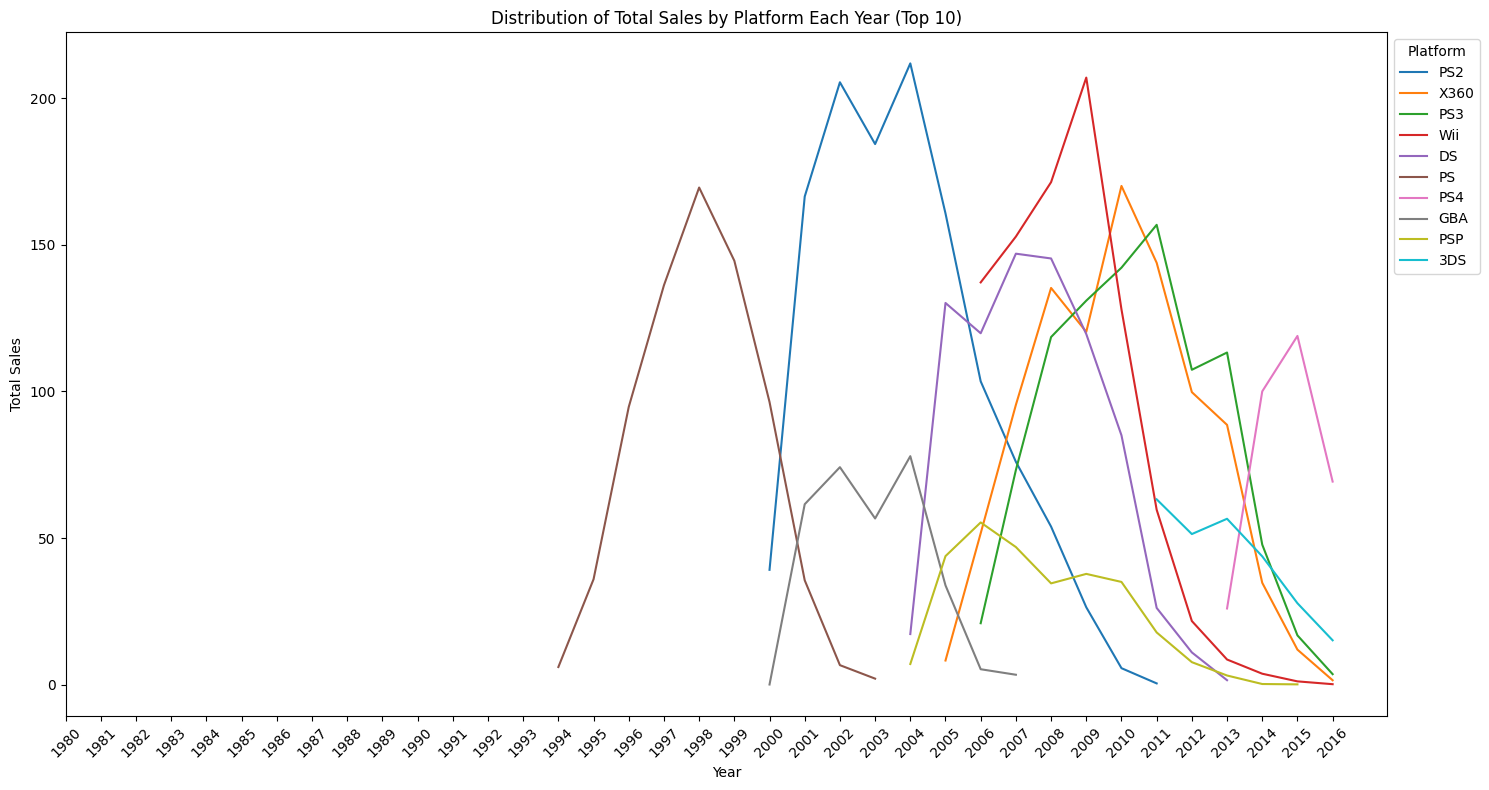

In [16]:
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Create a pivot table with total sales by year and platform
pivot_table = platform_year_sales.reset_index().pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Sort platforms by total sales and select the top 10
top_platforms = pivot_table.sum().sort_values(ascending=False).head(10).index
pivot_table_top = pivot_table[top_platforms]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
                 '#17becf']

pivot_table_top.plot(kind='line', ax=ax, color=color_palette)

ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.set_title('Distribution of Total Sales by Platform Each Year (Top 10)')
years = pivot_table_top.index
ax.set_xticks(years)
plt.xticks(rotation=45)
ax.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()

According to the graph, different platforms experienced peak sales at different times, which is logical because as consoles and their specifications are updated, one platform replaces another. In terms of lifespan:

- PS2: 2000-2011 - 11 years
- X360: 2005-2016 - 11 years
- PS3: 2006-2016 - 10 years
- Wii: 2006-2016 - 10 years
- DS: 2004-2013 - 9 years
- PS4: 2013-... - recently released
- GBA: 2000-2007 - 7 years
- PSP: 2004-2015 - 11 years
- 3DS: 2011-... - recently released

We conclude that the average lifespan of a platform fluctuates around 10 years, plus or minus a year or two, depending on external circumstances.

To determine the period for future forecasts from the table, let's immediately discard the initial period. Firstly, those platforms are no longer relevant, except for a niche audience of dedicated fans. Next, we should exclude peak years, which are unlikely to reflect the current state of the market. As mentioned earlier, the gaming industry has entered a stable phase, and now sales and the number of new games produced do not fluctuate as much. For future analysis and forecasts, we will use data starting from 2011.

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,0.00,0.00,0.00
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,0.00,0.00,0.00,0.00,0.00
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,0.00,0.00,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,0.00
PSV,4.63,16.19,10.59,11.90,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


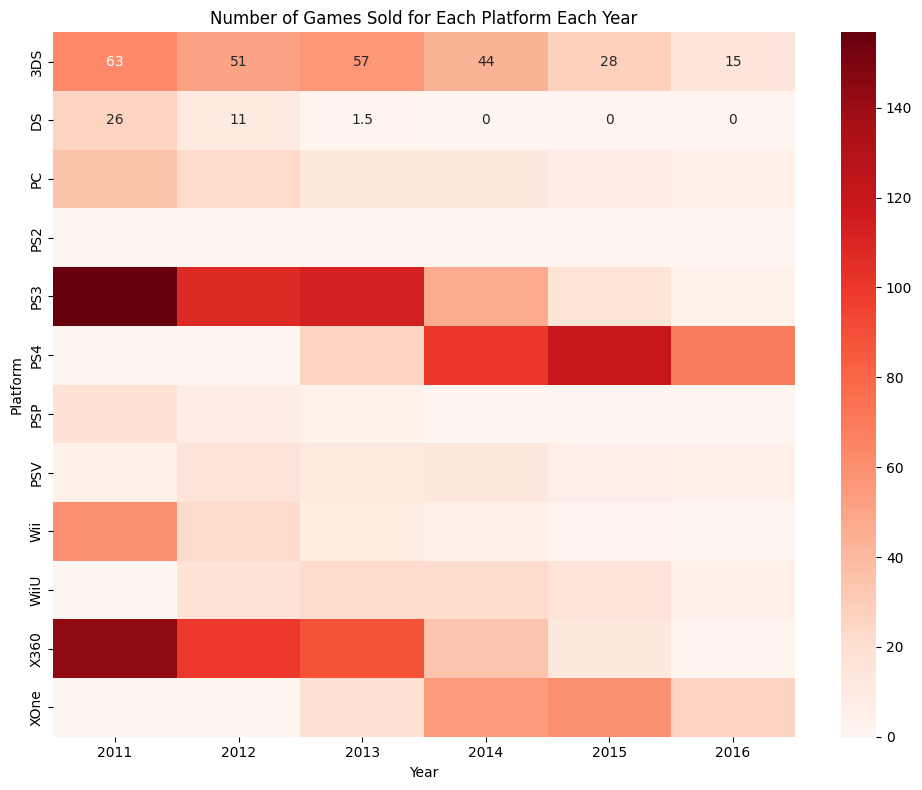

In [17]:
filtered_games = games[games['year_of_release'] >= 2011]
pivot_table = filtered_games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value=0)

display(pivot_table)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='Reds', annot=True)

plt.title('Number of Games Sold for Each Platform Each Year')
plt.xlabel('Year')
plt.ylabel('Platform')

plt.tight_layout()
plt.show()

Let's separately calculate sales for the PC platform since it doesn't fit into the logic of consoles. The power of a console, as well as the games created for it, is always tightly optimized for specific hardware, so they may become outdated and fall out of use. PCs, on the other hand, are updated, but games are simply optimized for average specifications for the average PC gamer. Therefore, the PC platform should have stable sales figures, albeit not as high as consoles.

year_of_release
1980      NaN
1981      NaN
1982      NaN
1983      NaN
1984      NaN
1985     0.04
1986      NaN
1987      NaN
1988     0.03
1989      NaN
1990      NaN
1991      NaN
1992     3.03
1993      NaN
1994    12.87
1995     4.22
1996    10.58
1997    11.27
1998     3.26
1999     4.74
2000     4.66
2001     5.47
2002     8.57
2003     8.84
2004    10.39
2005     4.37
2006     2.85
2007     9.28
2008    12.42
2009    16.91
2010    24.28
2011    35.03
2012    23.22
2013    12.38
2014    13.28
2015     8.52
2016     5.25
Name: PC, dtype: float64

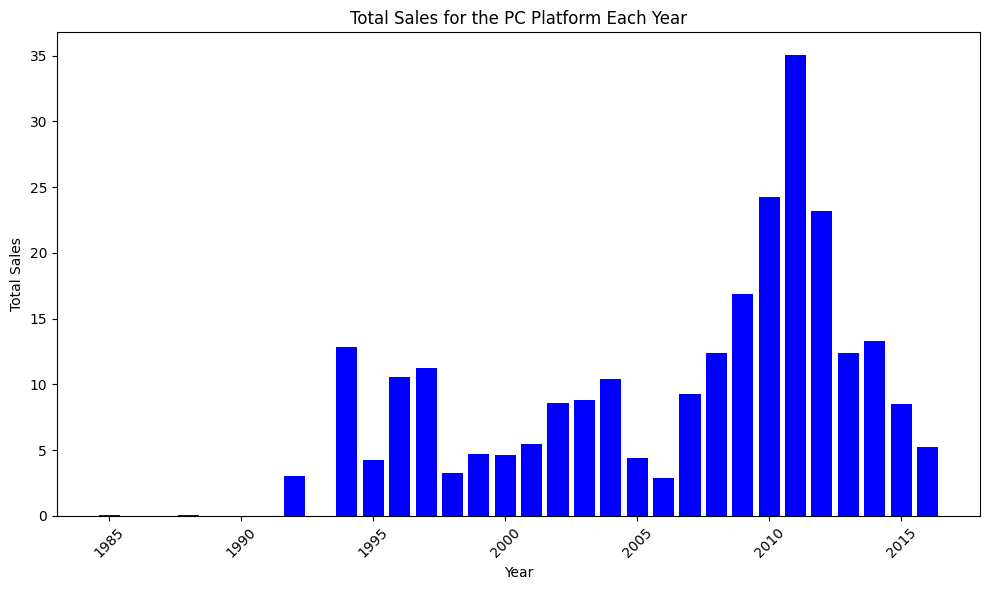

In [18]:
selected_platform = 'PC'
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum()
pc = platform_year_sales.reset_index().pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sales_data = pc[selected_platform]
display(sales_data)
plt.figure(figsize=(10, 6))
plt.bar(sales_data.index, sales_data.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title(f'Total Sales for the {selected_platform} Platform Each Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

And indeed, sales on the PC platform have never dropped to zero since 1994. This means that the PC should be considered in the overall forecast.

Potentially profitable platforms can be considered the latest console models - Xbox One, PS4, and PC. The declining sales of Xbox 360 and PS3 can be explained by the fact that Xbox One and PS4 have replaced them, so the manufacturing companies are gradually phasing them out. 3DS, PSVita, and WiiU have lower sales compared to their older counterparts and were released around 2011-2012. By 2017, they will be approaching the 'sunset,' but still have a few years left, so it would be worth considering them as less but promising platforms.

Let's create a boxplot for global game sales broken down by platforms.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


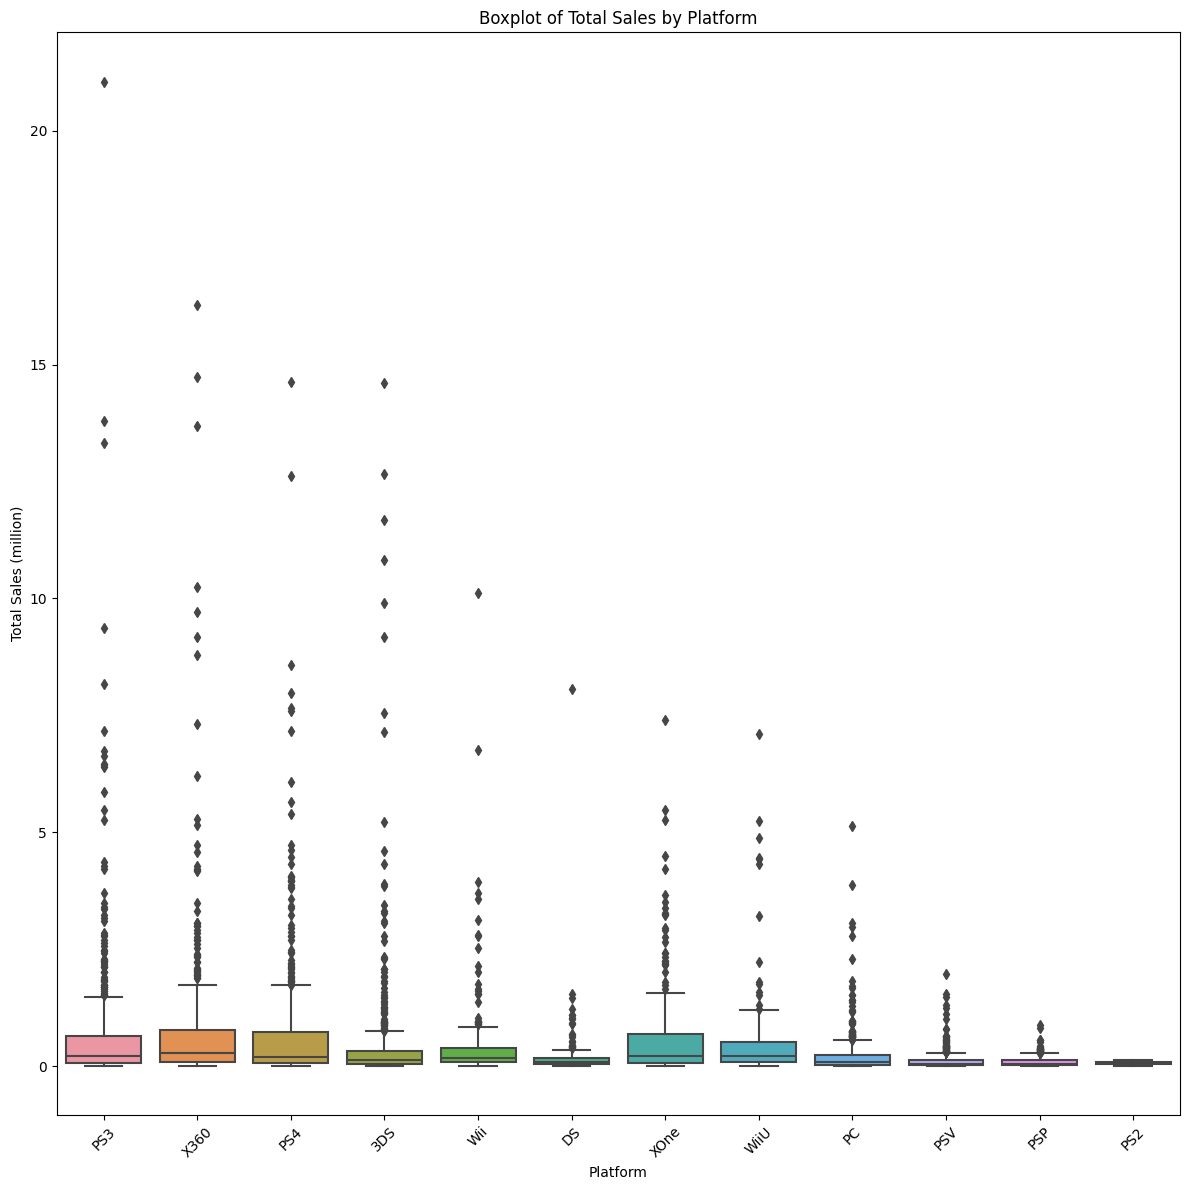

In [19]:
boxplot_platform_sales = filtered_games.pivot_table(index='platform', columns='year_of_release', values='total_sales')
plt.figure(figsize=(12, 12))
sns.boxplot(data=filtered_games, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (million)')
plt.title('Boxplot of Total Sales by Platform')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To zoom in on this graph, let's remove all the outliers.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


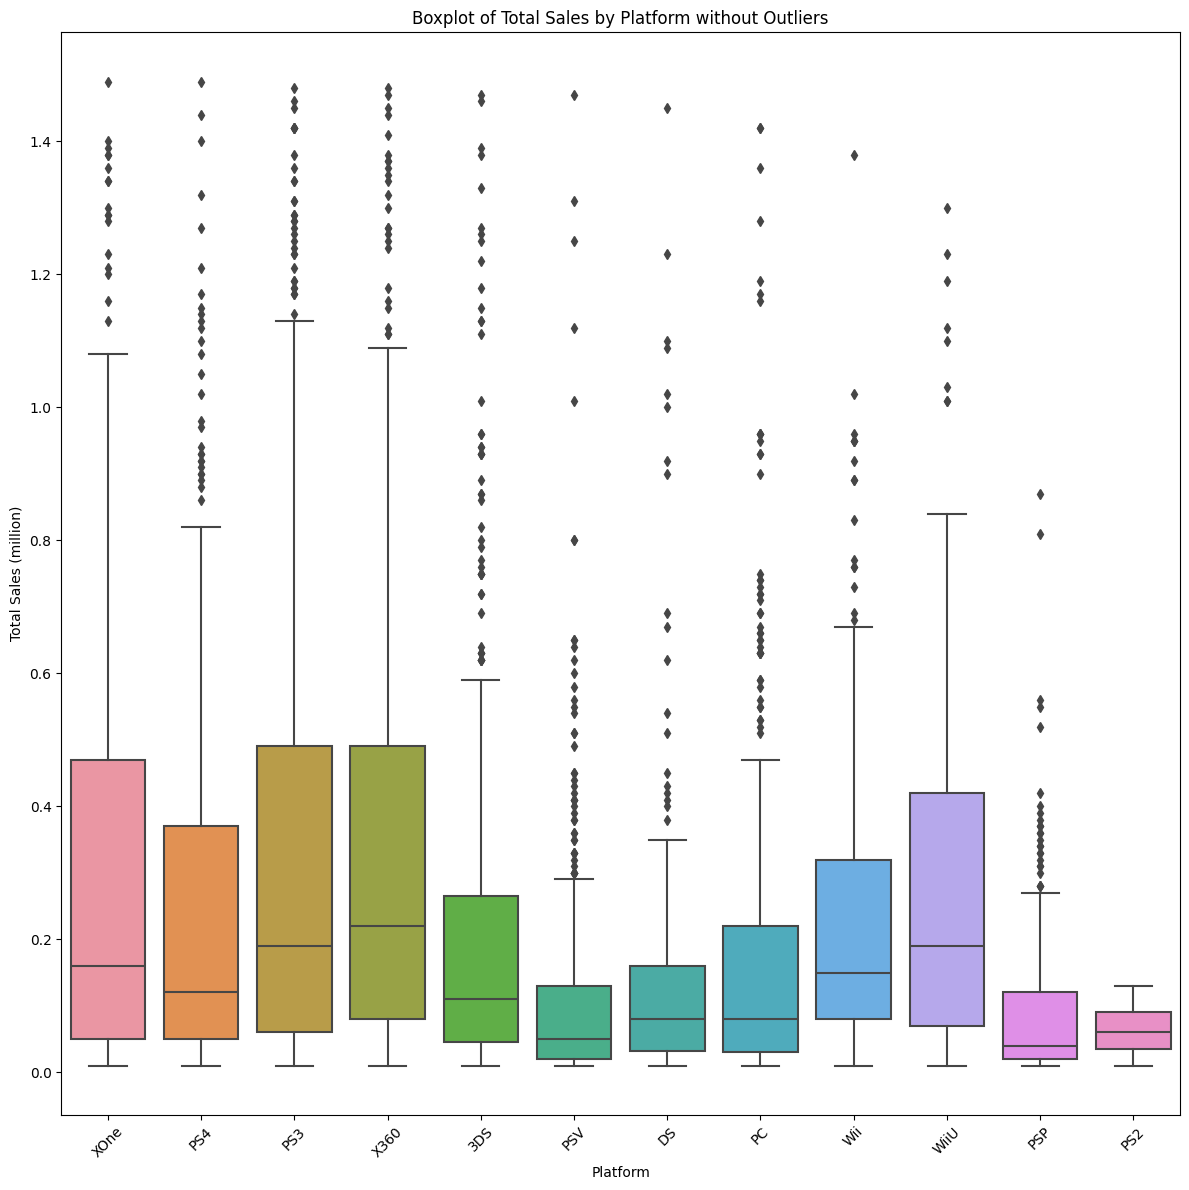

In [20]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=filtered_games[filtered_games['total_sales'] < 1.5], x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (million)')
plt.title('Boxplot of Total Sales by Platform without Outliers')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's keep only XOne, PS4, 3DS, PSV, PC, and WiiU.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


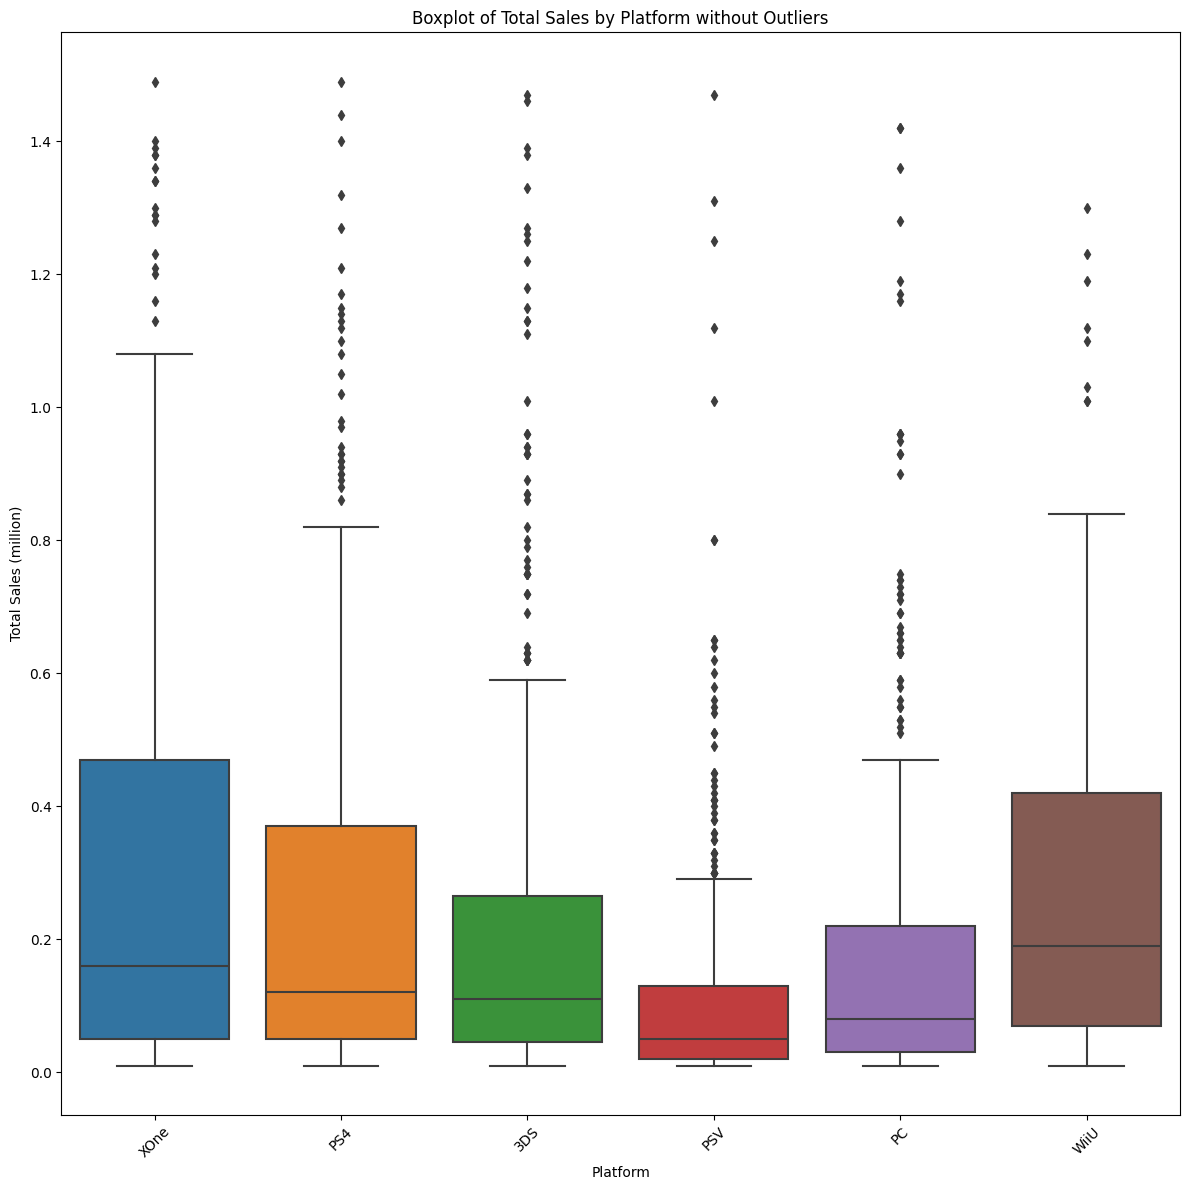

In [21]:
selected_platforms = ['XOne', 'PS4', '3DS', 'PSV', 'PC', 'WiiU']
filtered_games_new = filtered_games.query('platform in @selected_platforms')
plt.figure(figsize=(12, 12))
sns.boxplot(data=filtered_games_new[filtered_games_new['total_sales'] < 1.5], x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (million)')
plt.title('Boxplot of Total Sales by Platform without Outliers')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
xone_median = filtered_games_new[filtered_games_new['platform'] == 'XOne']['total_sales'].median()
display(f'Median value for Xbox One - {xone_median}')
ps4_median = filtered_games_new[filtered_games_new['platform'] == 'PS4']['total_sales'].median()
display(f'Median value for PS4 - {ps4_median}')
threeds_median = filtered_games_new[filtered_games_new['platform'] == '3DS']['total_sales'].median()
display(f'Median value for 3DS - {threeds_median}')
psv_median = filtered_games_new[filtered_games_new['platform'] == 'PSV']['total_sales'].median()
display(f'Median value for PS Vita - {psv_median}')
pc_median = filtered_games_new[filtered_games_new['platform'] == 'PC']['total_sales'].median()
display(f'Median value for PC - {pc_median}')
wiiu_median = filtered_games_new[filtered_games_new['platform'] == 'WiiU']['total_sales'].median()
display(f'Median value for WiiU - {wiiu_median}')

'Median value for Xbox One - 0.22'

'Median value for PS4 - 0.2'

'Median value for 3DS - 0.12'

'Median value for PS Vita - 0.05'

'Median value for PC - 0.08'

'Median value for WiiU - 0.22'

Priority should be given to Xbox One, WiiU, PS4, 3DS, PS Vita, PC.

Let's find the correlation of numerical values in the table 'filtered_games_new'. Let's start with Xbox One:

In [23]:
xbox = filtered_games_new.query('platform == "XOne"')
xbox_correlation_crsc = xbox['total_sales'].corr(xbox['critic_score'])
display(f'Correlation between total sales and critic scores = {xbox_correlation_crsc}')

'Correlation between total sales and critic scores = 0.41699832800840175'

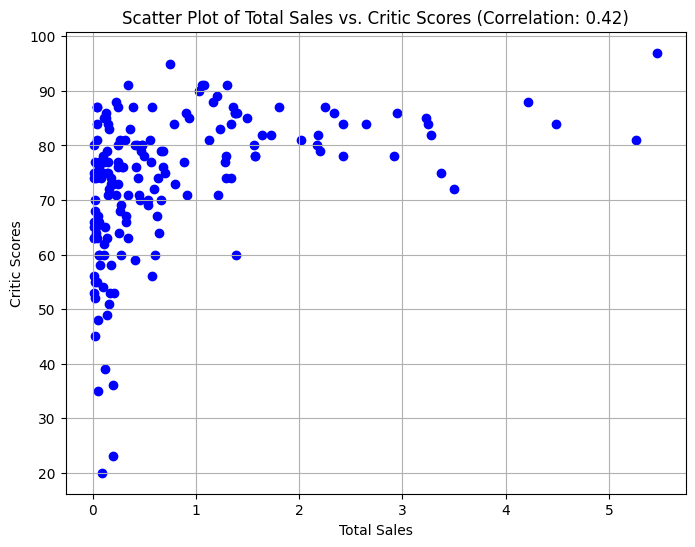

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(xbox['total_sales'], xbox['critic_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. Critic Scores (Correlation: {xbox_correlation_crsc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Critic Scores')
plt.grid(True)
plt.show()

In [25]:
xbox_correlation_usc = xbox['total_sales'].corr(xbox['user_score'])
display(f'Correlation between total sales and user scores = {xbox_correlation_usc}')

'Correlation between total sales and user scores = -0.06892505328279412'

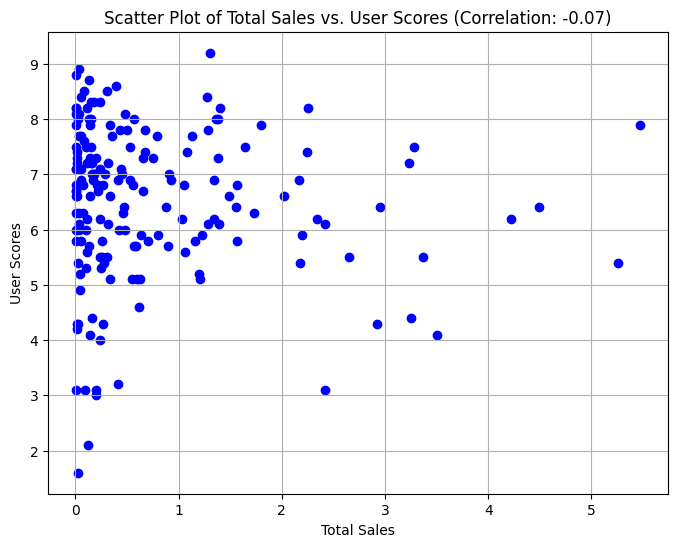

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(xbox['total_sales'], xbox['user_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. User Scores (Correlation: {xbox_correlation_usc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('User Scores')
plt.grid(True)
plt.show()

The correlation in the case of critic scores is extremely low, 0.42. And in the case of user scores, it's -0.7. In both cases, there is no strong dependence for Xbox One on critic scores and user scores.

Let's check the correlation with critic scores and user scores for PS4:

In [27]:
ps4 = filtered_games_new.query('platform == "PS4"')
ps4_correlation_crsc = ps4['total_sales'].corr(ps4['critic_score'])
display(f'Correlation between total sales and critic scores = {ps4_correlation_crsc}')

'Correlation between total sales and critic scores = 0.406567902061781'

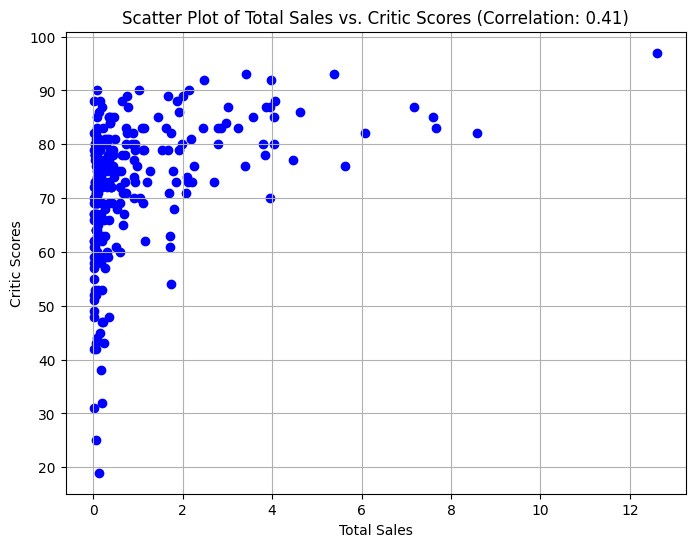

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(ps4['total_sales'], ps4['critic_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. Critic Scores (Correlation: {ps4_correlation_crsc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Critic Scores')
plt.grid(True)
plt.show()

In [29]:
ps4_correlation_usc = ps4['total_sales'].corr(ps4['user_score'])
display(f'Correlation between total sales and user scores = {ps4_correlation_usc}')

'Correlation between total sales and user scores = -0.031957110204556424'

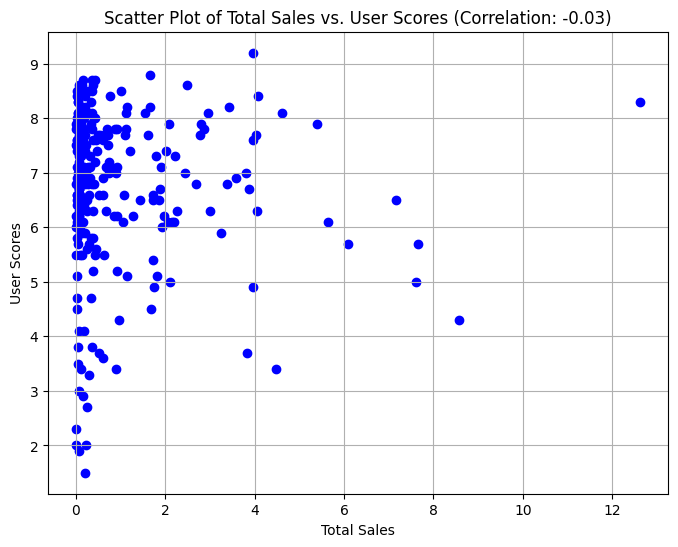

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(ps4['total_sales'], ps4['user_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. User Scores (Correlation: {ps4_correlation_usc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('User Scores')
plt.grid(True)
plt.show()

The correlation in the case of total sales for PS4 and critic scores is extremely low - 0.41. And in the case of user scores, it is also negative - -0.03. In both cases, the correlation is too small, so no direct or inverse linear dependence is found.

Let's check the correlation for 3DS.

In [31]:
threeds = filtered_games_new.query('platform == "3DS"')
threeds_correlation_crsc = threeds['total_sales'].corr(threeds['critic_score'])
display(f'Correlation between total sales and critic scores = {threeds_correlation_crsc}')

'Correlation between total sales and critic scores = 0.34873973059848346'

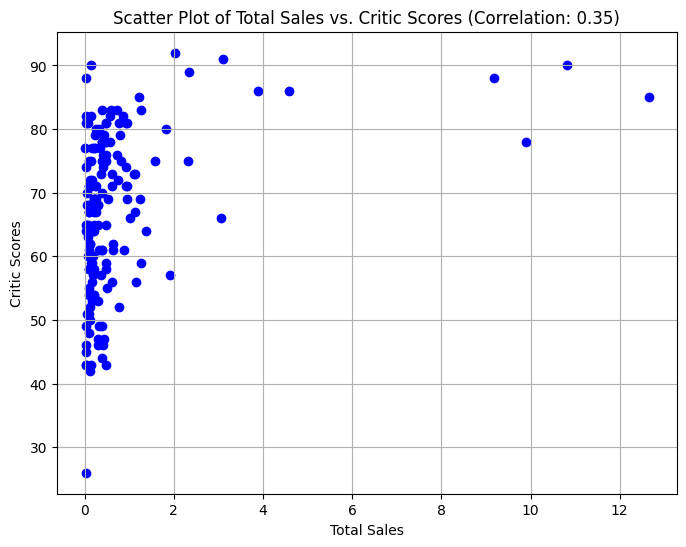

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(threeds['total_sales'], threeds['critic_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. Critic Scores (Correlation: {threeds_correlation_crsc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Critic Scores')
plt.grid(True)
plt.show()

In [33]:
threeds_correlation_usc = threeds['total_sales'].corr(threeds['user_score'])
display(f'Correlation between total sales and critic scores = {threeds_correlation_usc}')

'Correlation between total sales and critic scores = 0.22207843643390884'

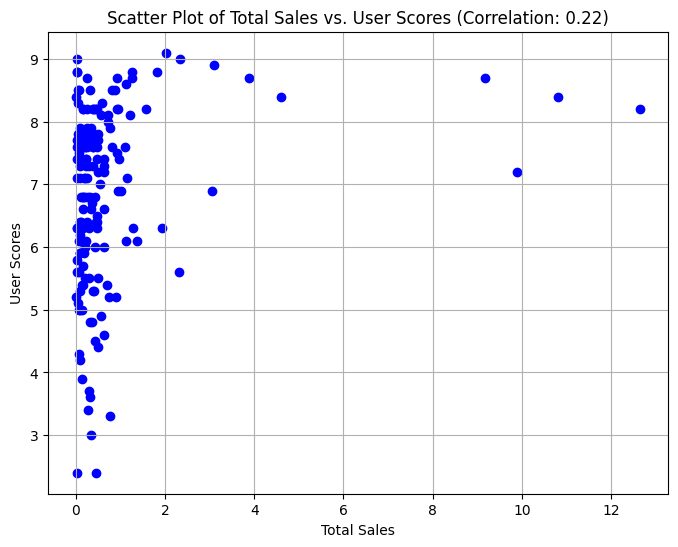

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(threeds['total_sales'], threeds['user_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. User Scores (Correlation: {threeds_correlation_usc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('User Scores')
plt.grid(True)
plt.show()

The correlation in the case of total sales for 3DS and critic scores is extremely low - 0.35. And in the case of user scores, it is 0.22. In both cases, the correlation is too small, so no direct linear dependence is found.

Let's check the correlation for PS Vita.

In [35]:
psv = filtered_games_new.query('platform == "PSV"')
psv_correlation_crsc = psv['total_sales'].corr(psv['critic_score'])
display(f'Correlation between total sales and critic scores = {psv_correlation_crsc}')

'Correlation between total sales and critic scores = 0.13176292727608935'

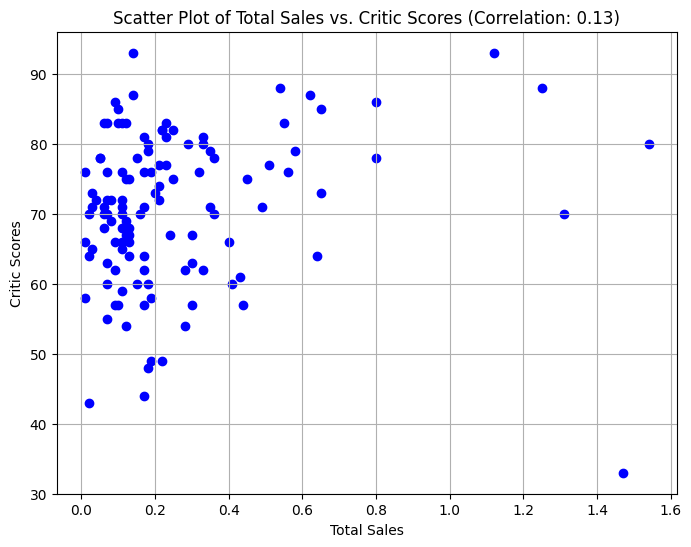

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(psv['total_sales'], psv['critic_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. Critic Scores (Correlation: {psv_correlation_crsc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Critic Scores')
plt.grid(True)
plt.show()

In [37]:
psv_correlation_usc = psv['total_sales'].corr(psv['user_score'])
display(f'Correlation between total sales and critic scores = {psv_correlation_usc}')

'Correlation between total sales and critic scores = 0.013488756835886498'

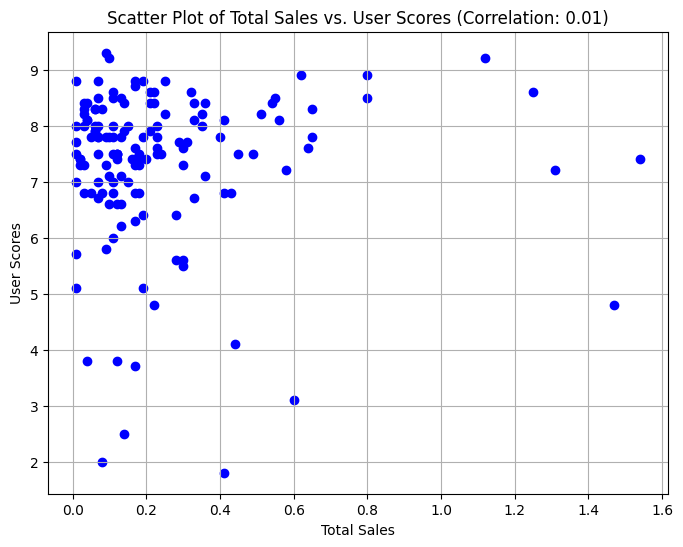

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(psv['total_sales'], psv['user_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. User Scores (Correlation: {psv_correlation_usc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('User Scores')
plt.grid(True)
plt.show()

The correlation between user scores and critic scores on the PS Vita platform is extremely low, and no linear dependence is found.

Let's check the correlation for PC.

In [39]:
pc = filtered_games_new.query('platform == "PC"')
pc_correlation_crsc = pc['total_sales'].corr(pc['critic_score'])
display(f'Correlation between total sales and critic scores = {pc_correlation_crsc}')

'Correlation between total sales and critic scores = 0.31418473969036315'

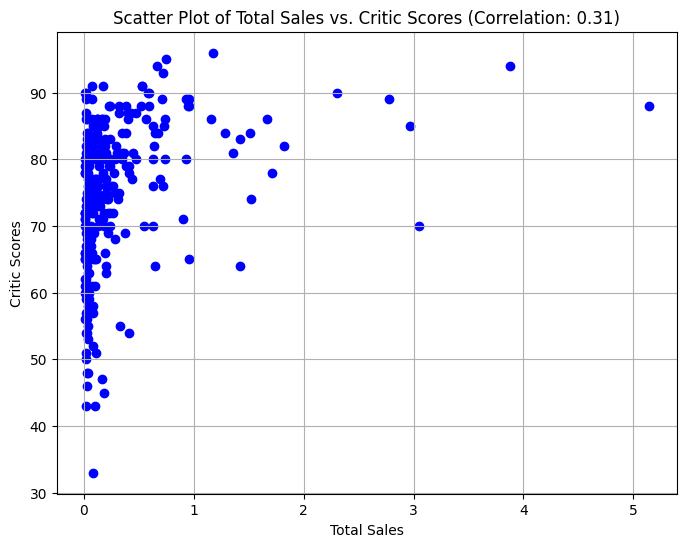

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(pc['total_sales'], pc['critic_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. Critic Scores (Correlation: {pc_correlation_crsc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Critic Scores')
plt.grid(True)
plt.show()

In [41]:
pc_correlation_usc = pc['total_sales'].corr(pc['user_score'])
display(f'Correlation between total sales and critic scores = {pc_correlation_usc}')

'Correlation between total sales and critic scores = -0.04896683233511954'

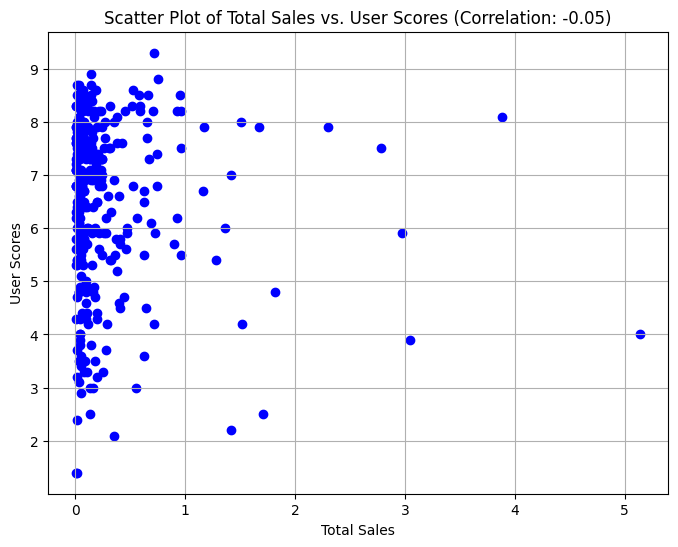

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(pc['total_sales'], pc['user_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. User Scores (Correlation: {pc_correlation_usc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('User Scores')
plt.grid(True)
plt.show()

The correlation in the case of total PC sales with critic reviews and user ratings is extremely low, and no linear dependence was found.

The correlation of WiiU with critic reviews and user ratings.

In [43]:
wiiu = filtered_games_new.query('platform == "WiiU"')
wiiu_correlation_crsc = wiiu['total_sales'].corr(wiiu['critic_score'])
display(f'Correlation between total sales and critic scores = {wiiu_correlation_crsc}')

'Correlation between total sales and critic scores = 0.3483797601201749'

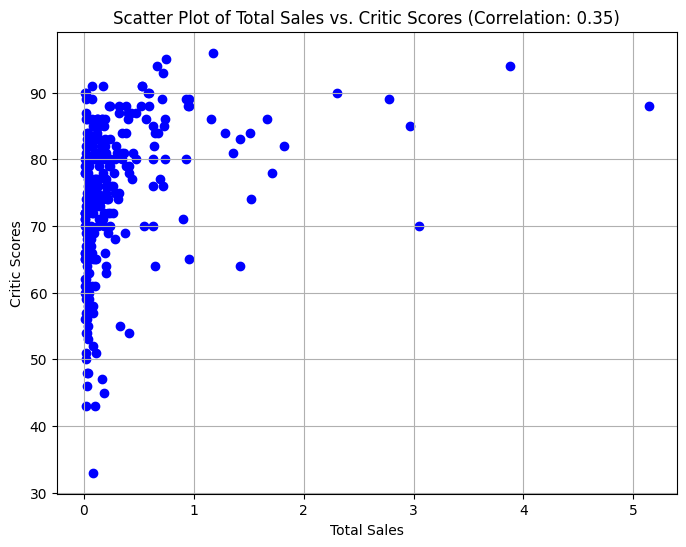

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(pc['total_sales'], pc['critic_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. Critic Scores (Correlation: {wiiu_correlation_crsc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Critic Scores')
plt.grid(True)
plt.show()

In [45]:
wiiu_correlation_usc = wiiu['total_sales'].corr(wiiu['user_score'])
display(f'Correlation between total sales and critic scores = {wiiu_correlation_usc}')

'Correlation between total sales and critic scores = 0.4002190202148617'

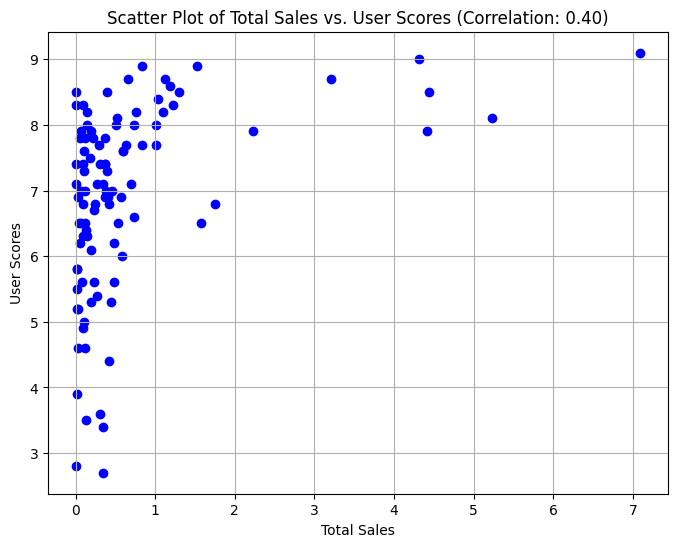

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(wiiu['total_sales'], wiiu['user_score'], color='blue')
plt.title(f'Scatter Plot of Total Sales vs. User Scores (Correlation: {wiiu_correlation_usc:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('User Scores')
plt.grid(True)
plt.show()

The correlation of total sales for the WiiU platform with user and critic scores is extremely low, and a strong linear dependence is not observed.

_Conclusion_: No correlation between total sales and critic or user scores was found for any of the platforms. Therefore, if critic and user scores do influence sales, the impact is insignificant.

Let's examine the overall distribution of games by genre. We'll determine which genres are the most profitable and check if there are any genres with high or low sales that stand out.

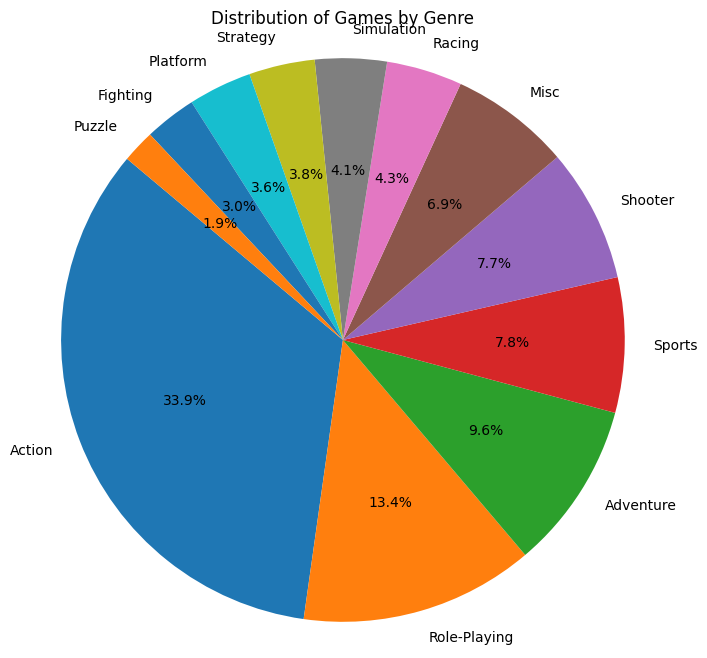

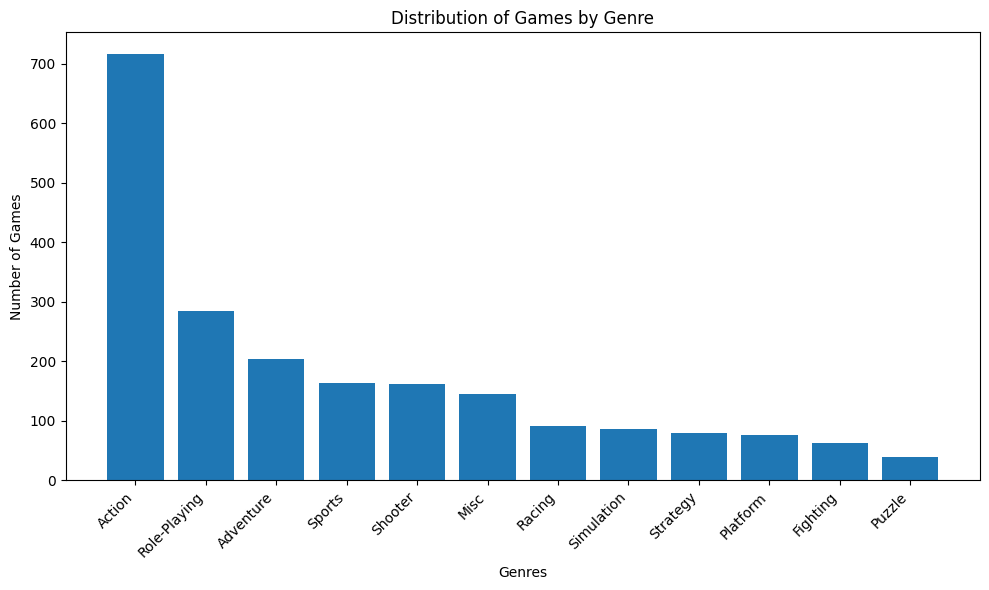

In [47]:
genre_counts = filtered_games_new['genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Games by Genre')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Genre')
plt.tight_layout()
plt.show()

On this histogram depicting the distribution of games by genre, it is evident that the most popular genre is Action, constituting one-third of all games presented on platforms at 33.9%. Role-playing games follow with a significant lag at 13.4%. Adventure games make up another 9.6%, while shooters and sports games each account for 7.7%. Other genres have a much smaller share, with fewer than 100 titles for the given period.

Now, let's examine the profitability of each genre.

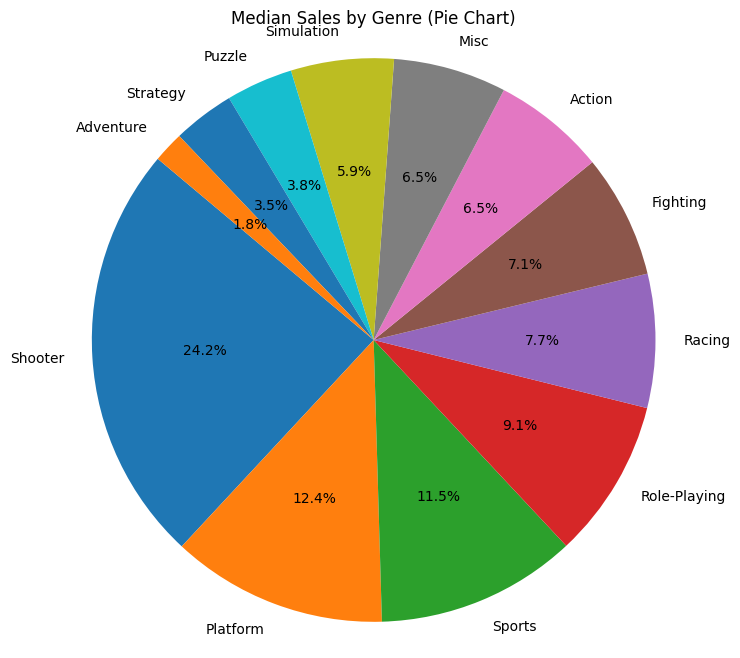

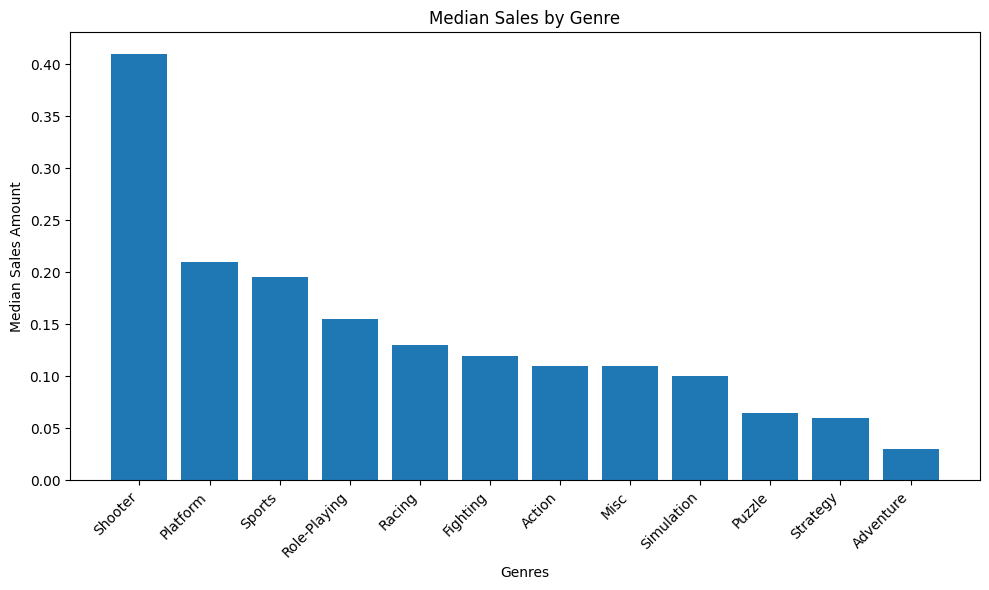

In [48]:
genre_sales_agg = filtered_games_new.groupby('genre')['total_sales'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(genre_sales_agg, labels=genre_sales_agg.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Median Sales by Genre (Pie Chart)')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(genre_sales_agg.index, genre_sales_agg)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Median Sales Amount')
plt.title('Median Sales by Genre')
plt.tight_layout()
plt.show()

_Conclusion_: The most profitable genres on the presented platforms (Xbox One, WiiU, PS4, 3DS, PS Vita, PC) are Shooters - 24.2%, Platformers - 12.4%, Sports Games - 11.5%, and Role-playing Games - 9.1%. Despite action games having the highest number of titles in the market, their profitability is far from high. In contrast, shooters, comprising only 7.7% of titles, have the highest median profitability. Platformers follow with around 3% of games but with a median sales value of 12.4%. We can conclude that, despite the quantity of games in popular genres like action, only a small portion of them is highly profitable. Platformers and sports games, on the other hand, with a lower number of games, have a higher average profitability, indicating better sales.

## Let's determine the user profile for different regions. Specifically, the top 5 platforms, top 5 genres, and the impact of ESRB ratings on sales in each region.

We will use data from the "relevant period," starting from 2011. We'll begin with North America.

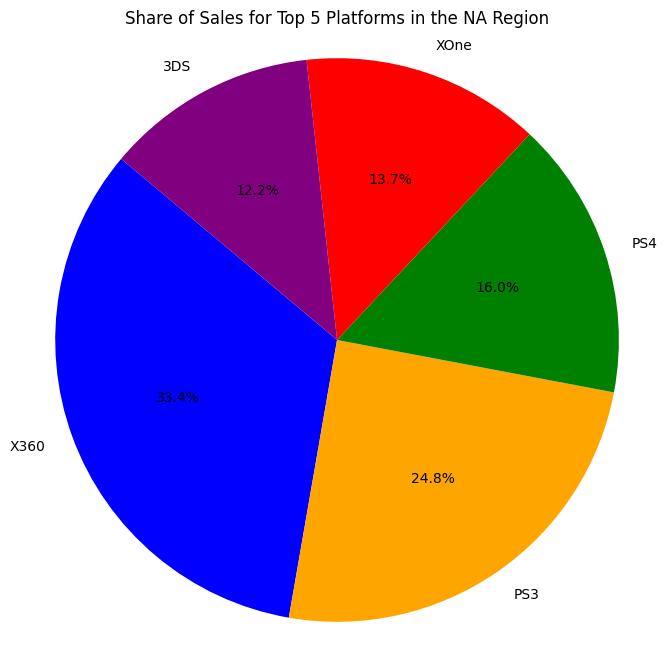

In [49]:
filtered_games_na = filtered_games.pivot_table(index='platform', values='na_sales', aggfunc='sum')
top_na_platforms = filtered_games_na.sort_values(by='na_sales', ascending=False).head(5)
platforms = top_na_platforms.index
sales = top_na_platforms['na_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=platforms, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Platforms in the NA Region')
plt.axis('equal')
plt.show()

The most popular platform in North America is the Xbox 360, followed by the PS3 and PS4. It's evident that the new platforms have just started gaining traction, so the PS4 and Xbox One currently have fewer copies of games sold. This is logical. In the early years of console releases, developers need time to fully understand the platform and start producing high-quality hits. Additionally, during the initial period, developers aim to support users of older console generations and release new hits for them as well, albeit with reduced performance.

Now let's see how things are in the European region.

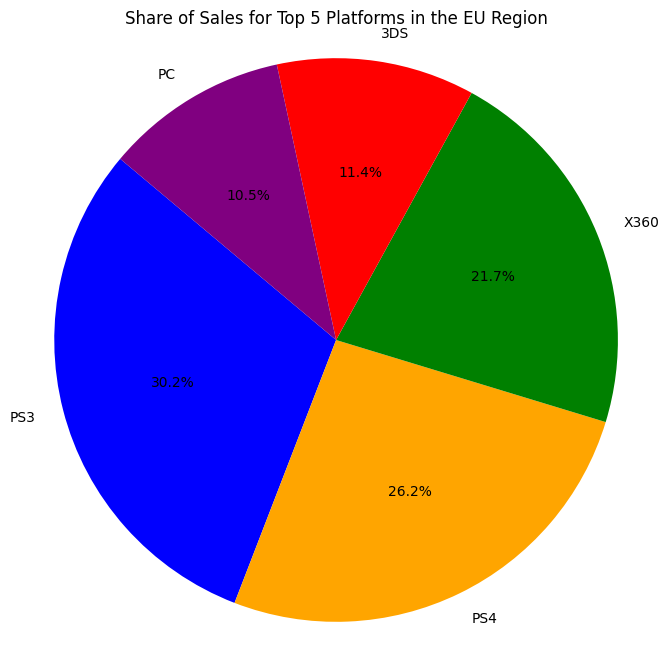

In [50]:
filtered_games_eu = filtered_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
top_eu_platforms = filtered_games_eu.sort_values(by='eu_sales', ascending=False).head(5)
platforms = top_eu_platforms.index
sales = top_eu_platforms['eu_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=platforms, autopct='%.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Platforms in the EU Region')
plt.axis('equal')
plt.show()

From the diagram, it is evident that Japanese developers dominate the European market. PS3 and PS4 account for more than half of all copies of games sold in this region. It can be seen that the PS4 has already begun to catch up with its predecessor in terms of the number of copies sold.

Let's now create a similar diagram for data from Japan.

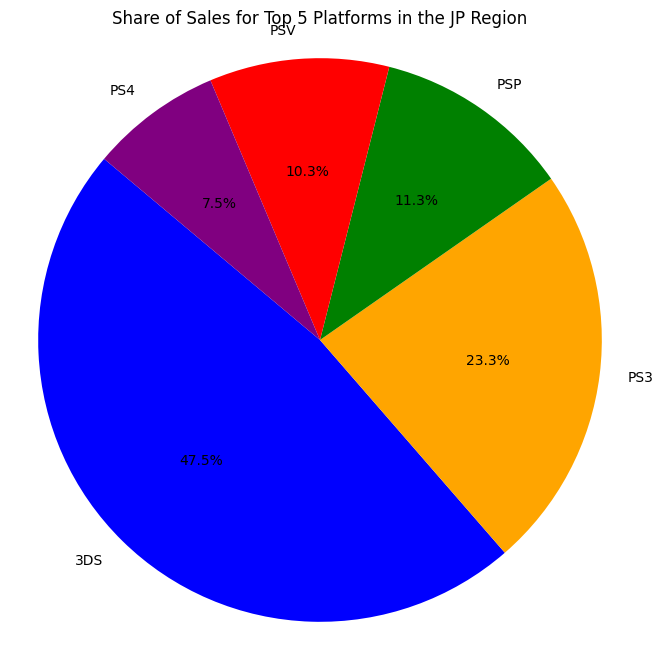

In [51]:
filtered_games_jp = filtered_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
top_jp_platforms = filtered_games_jp.sort_values(by='jp_sales', ascending=False).head(5)
platforms = top_jp_platforms.index
sales = top_jp_platforms['jp_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=platforms, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Platforms in the JP Region')
plt.axis('equal')
plt.show()

As expected, Nintendo historically dominates a significant portion of the market in Japan. From the diagram, it's evident that half of all games sold in Japan are for the Nintendo 3DS. It's also worth noting that the American console Xbox did not make it into the top 5 in terms of the number of copies sold in this region. Additionally, the emergence of portable platforms from Sony, including their portable consoles PlayStation Vita and Portable, is noticeable.

Now let's see which genres are most popular in each region.

Let's start with North America.

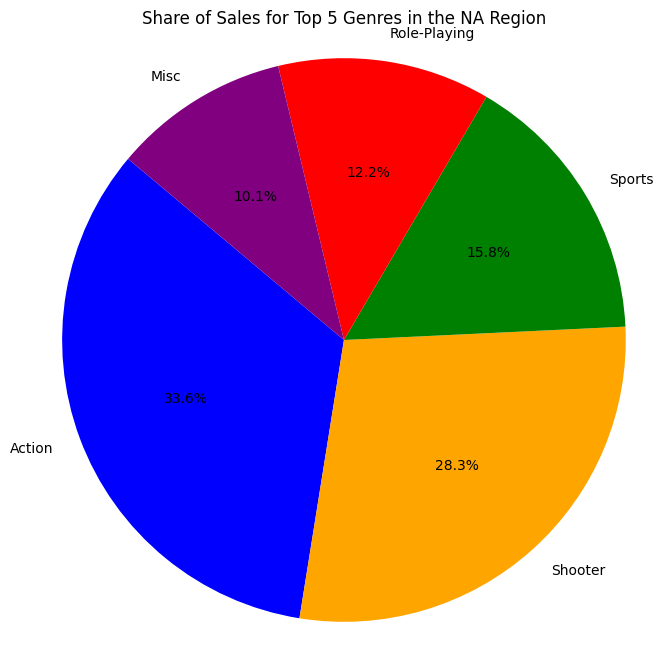

In [52]:
filtered_games_genre = filtered_games.pivot_table(index='genre', values='na_sales', aggfunc='sum')
top_na_genres = filtered_games_genre.sort_values(by='na_sales', ascending=False).head(5)
genres = top_na_genres.index
sales = top_na_genres['na_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=genres, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Genres in the NA Region')
plt.axis('equal')
plt.show()

The most popular genre in North America is Action, followed closely by shooters. This aligns well with reality. Next are sports games, which historically have always brought significant profits to their creators, considering series like FIFA and PES. Following with a slight gap are role-playing games. Given that industry titans like World of Warcraft are based in the USA, this also corresponds to reality.

Now, let's see which genres are popular in the European region.

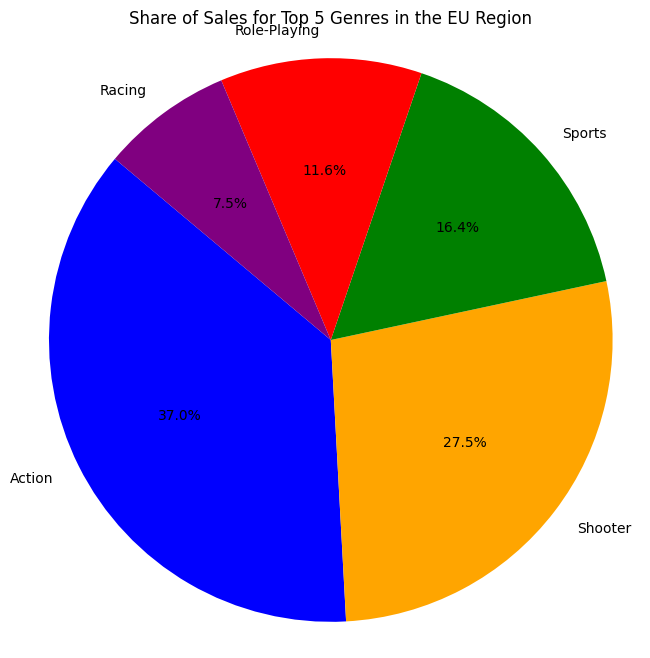

In [53]:
filtered_games_genre = filtered_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
top_eu_genres = filtered_games_genre.sort_values(by='eu_sales', ascending=False).head(5)
genres = top_eu_genres.index
sales = top_eu_genres['eu_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=genres, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Genres in the EU Region')
plt.axis('equal')
plt.show()

In the European region, the most popular genres are roughly similar, with the only difference being that racing games take the fifth spot. Otherwise, the picture is similar to the popular genres in North America.

Let's see what the situation is in Japan.

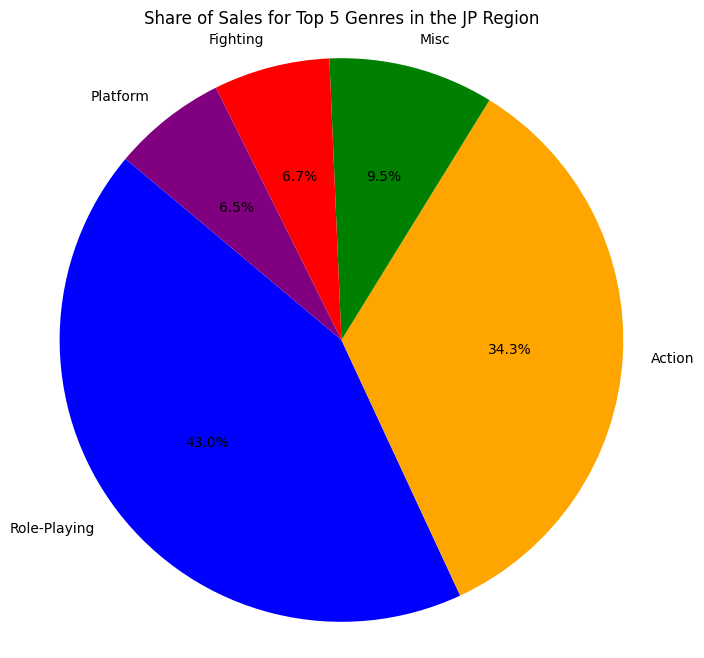

In [54]:
filtered_games_genre = filtered_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
top_jp_genres = filtered_games_genre.sort_values(by='jp_sales', ascending=False).head(5)
genres = top_jp_genres.index
sales = top_jp_genres['jp_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=genres, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Genres in the JP Region')
plt.axis('equal')
plt.show()

In Japan, the most popular genre is role-playing games, which is not surprising, especially considering the existence of a distinct genre in games called JRPG (Japanese Role-Playing Game). Historically, many Japanese and non-Japanese players engage in this genre, with the Final Fantasy series being a vivid example. Following closely is the Action genre, which is consistently popular across all regions. Additionally, the fighting genre has historical popularity not only in Japan but also in all Asian countries, as evident from franchises like Tekken and Street Fighter. It is logical to see platformer games on this diagram, as they are common representatives on portable consoles.

Now let's explore how the game rating influences its sales in each of the regions.

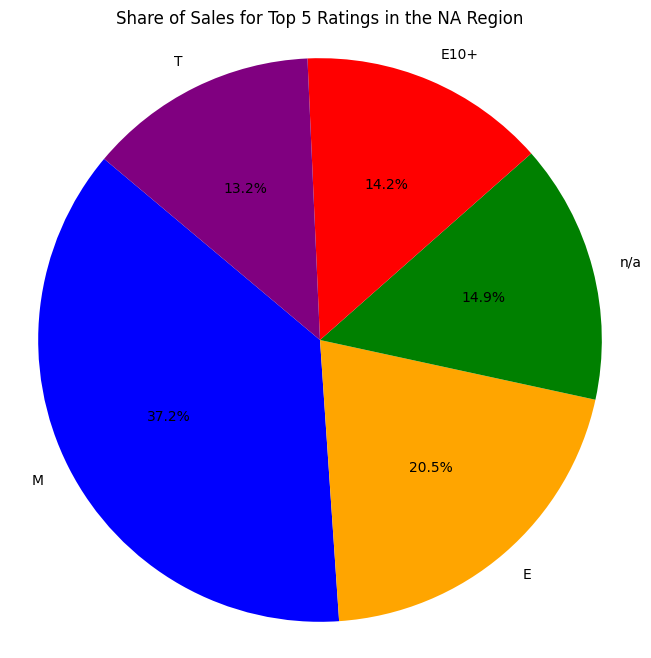

In [55]:
filtered_games_rating = filtered_games.pivot_table(index='rating', values='na_sales', aggfunc='sum')
top_na_ratings = filtered_games_rating.sort_values(by='na_sales', ascending=False).head(5)
ratings = top_na_ratings.index
sales = top_na_ratings['na_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=ratings, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Ratings in the NA Region')
plt.axis('equal')
plt.show()

Judging by the diagram, games with an M rating (17+, containing violence and strong language) sell the best. Following are games suitable for all ages, and then there are numerous gaps. Given that it's unlikely that all these games have no rating (as far as I know, in the North American market, selling games, movies, or any other digital and non-digital content is not allowed without a rating), these are probably data gaps that cannot be filled. However, considering that the gaps represent only about 15% of the total number of games presented in North America, it can be concluded that the most "popular" rating for games in North America is indeed the 17+ rating.

Now let's see which rating games sell the best in the European region.

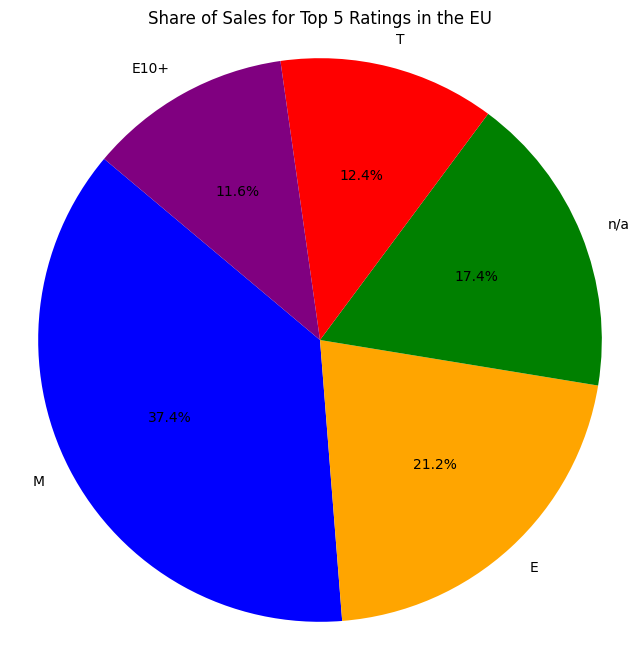

In [56]:
filtered_games_rating = filtered_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
top_eu_ratings = filtered_games_rating.sort_values(by='eu_sales', ascending=False).head(5)
ratings = top_eu_ratings.index
sales = top_eu_ratings['eu_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=ratings, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Ratings in the EU')
plt.axis('equal')
plt.show()

The European region overall shows a similar pattern to North America with slight differences. Games with an M rating (17+) also sell the best, and there are gaps around 17%. Following are games with a rating suitable for all ages, almost evenly split between teen and 10+ age ratings. We can conclude that "mature" games are more popular in the European region.

Now let's see how things are in Japan.

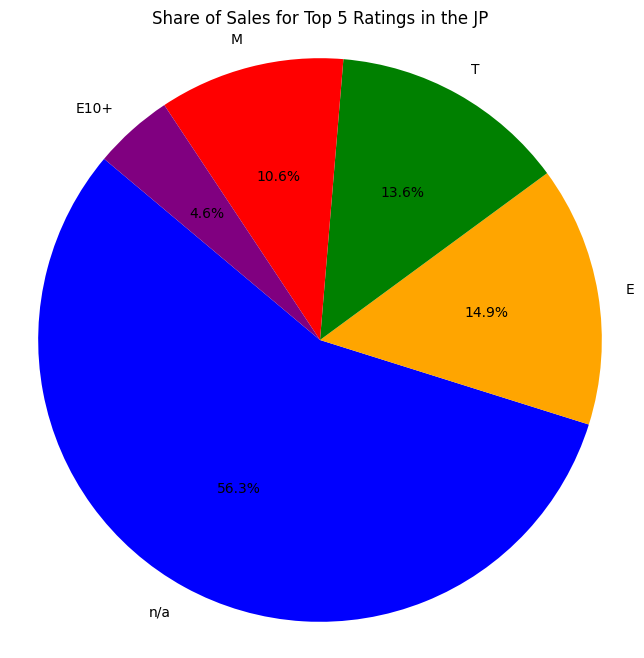

In [57]:
filtered_games_rating = filtered_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
top_jp_ratings = filtered_games_rating.sort_values(by='jp_sales', ascending=False).head(5)
ratings = top_jp_ratings.index
sales = top_jp_ratings['jp_sales']

plt.figure(figsize=(8, 8))
plt.pie(sales, labels=ratings, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Share of Sales for Top 5 Ratings in the JP')
plt.axis('equal')
plt.show()

Unfortunately, in Japan, more than half of the games lack a rating, making it challenging to determine the most common rating among purchased games. Following are games with ratings suitable for all ages, then teen-rated games, and only after that, mature-rated games. However, considering the historical dominance of the Mario Bros. franchise and other Nintendo games that are always released for all ages, it's preferable to assume that games with lower ratings are more popular in Japan.

_Conclusion_: In North America and Europe, games with a more mature rating prevail. In Japan, however, games with ratings for all ages and teen-rated games sell better. This is logical, considering one of the best-selling game franchises in North America and Europe is the GTA universe, which has always had high ratings. Meanwhile, in Japan, the most popular games are often platformers and action games like the Mario Bros. and Pokémon franchises.

_Conclusion for the entire 4th step_: The result was predictable and confirmed by the data. In North America and Europe, action and shooter games dominate, while in Japan, a slightly different gaming culture has historically developed, with RPGs, action, fighting, and platformer games selling the best. The platforms vary by region, and it's logical to see a significant market share for Xbox in North America, where it competes almost evenly with Sony, which has historically dominated the console market since time immemorial. This dominance is more pronounced in Europe, while in Japan, only domestic manufacturers made it into the top 5.

It is also logical that in North America and Europe, games with a more mature rating prevail. In Japan, however, games with ratings for all ages and teen-rated games sell better. This aligns with the fact that one of the best-selling game franchises in North America and Europe is the GTA universe, which has always had high ratings. Meanwhile, in Japan, the most popular games are often platformers and action games like the Mario Bros. and Pokémon franchises.

## Let's check the following hypotheses.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

The average user ratings for Xbox One and PC platforms are the same.
The average user ratings for Action and Sports genres are different.
Let's test the first hypothesis that user ratings for Xbox One and PC platforms are the same. To do this, let's first formulate the null and alternative hypotheses:

Null Hypothesis (H0): The average user ratings for Xbox One and PC platforms are equal.

Alternative Hypothesis (H1): The average user ratings for Xbox One and PC platforms are different.

In [58]:
xbox_data = filtered_games[filtered_games['platform'] == 'XOne']
pc_data = filtered_games[filtered_games['platform'] == 'PC']

xbox_data = xbox_data.dropna(subset=['user_score'])
pc_data = pc_data.dropna(subset=['user_score'])

hypothesis01 = st.ttest_ind(xbox_data['user_score'], pc_data['user_score'], equal_var=False)
print("p-value:", hypothesis01.pvalue)

alpha = 0.01
if hypothesis01.pvalue < alpha:
    print("Reject the null hypothesis: Average user ratings for Xbox One and PC platforms are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings for Xbox One and PC platforms are equal.")

p-value: 0.6130712247638477
Fail to reject the null hypothesis: Average user ratings for Xbox One and PC platforms are equal.


Visualizing the data.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

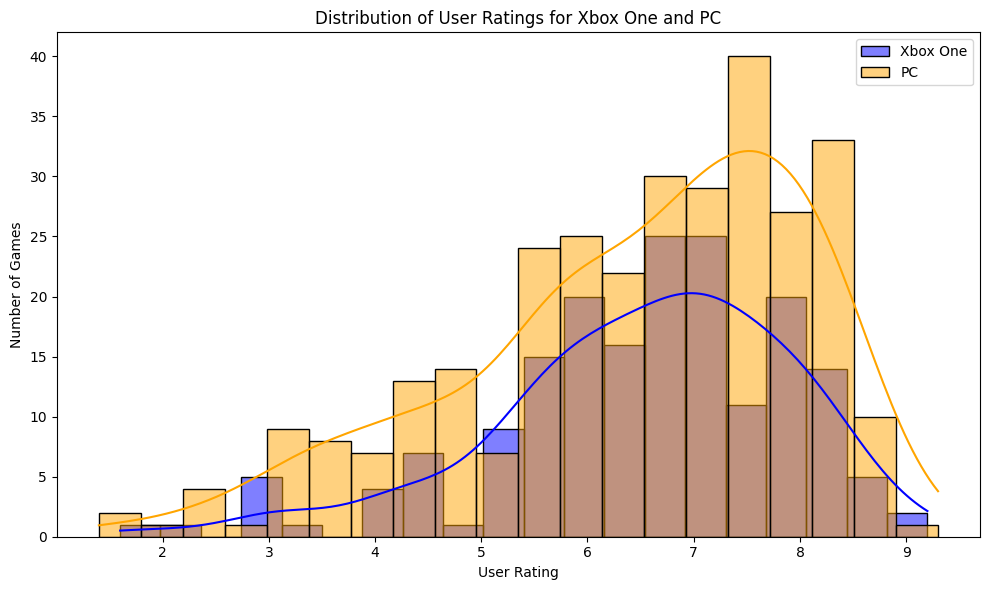

In [59]:
plt.figure(figsize=(10, 6))

sns.histplot(xbox_data['user_score'], label='Xbox One', kde=True, color='blue', bins=20)
sns.histplot(pc_data['user_score'], label='PC', kde=True, color='orange', bins=20)

plt.title('Distribution of User Ratings for Xbox One and PC')
plt.xlabel('User Rating')
plt.ylabel('Number of Games')
plt.legend()

plt.tight_layout()
plt.show()

_Conclusion_: On average, users give similar ratings to the two platforms, Xbox One and PC, which is generally logical because in both cases, the conditions for game developers are set by Microsoft. Therefore, the optimization and quality of all games are approximately similar on both platforms. The hypothesis was correct and confirmed by the data.

Now let's test the second hypothesis that the average user ratings for Action and Sports genres are different. To do this, we will formulate the null and alternative hypotheses.

Null Hypothesis (H0): The average user ratings for Action and Sports genres are equal.
Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.

In [60]:
action_data = filtered_games[(filtered_games['genre'] == 'Action') & (~filtered_games['user_score'].isnull())]
sports_data = filtered_games[(filtered_games['genre'] == 'Sports') & (~filtered_games['user_score'].isnull())]

hypothesis02 = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)
print("p-value:", hypothesis02.pvalue)

alpha = 0.01
if hypothesis02.pvalue < alpha:
    print("Reject the null hypothesis: Average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are equal.")

p-value: 8.285648549432565e-19
Reject the null hypothesis: Average user ratings for Action and Sports genres are different.


Visualizing the data.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

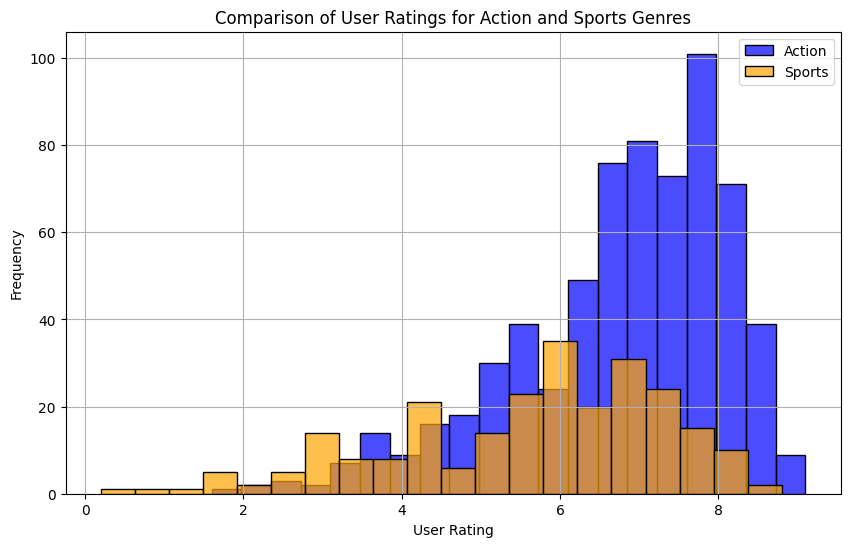

In [61]:
plt.figure(figsize=(10, 6))

action_data = filtered_games[(filtered_games['genre'] == 'Action') & (~filtered_games['user_score'].isnull())]
sports_data = filtered_games[(filtered_games['genre'] == 'Sports') & (~filtered_games['user_score'].isnull())]

sns.histplot(action_data['user_score'], bins=20, label='Action', color='blue', alpha=0.7)

sns.histplot(sports_data['user_score'], bins=20, label='Sports', color='orange', alpha=0.7)

plt.title('Comparison of User Ratings for Action and Sports Genres')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

_Conclusion_: The hypothesis was correct; indeed, the average user ratings for the Action and Sports genres are different.

## MAIN RESEARCH CONCLUSION:
During the data loading stage, several shortcomings in the data were identified, requiring data preprocessing:

- All columns were converted to lowercase for ease of further analysis.
- The "year_of_release" column was converted to the date type.
- Missing values in the "genre" column were removed.
- Empty values in the "rating" column were replaced with "n/a."
- No explicit duplicates were found.
- It was observed that critic and user ratings were within the specified limits, with critics ranging from 0 to 100 and users from 0 to 10.

Subsequently, an exploratory data analysis was conducted:

- It was noted that the number of released games over the years corresponds to the actual situation, with a quiet period during the emergence of the industry from 1980 to 1995. Subsequently, there was steady growth, reaching peak values between 2000 and 2011. Afterward, stability was achieved, and the number of released games approached the range of 500-600 games per year.
- The most successful platforms in terms of sales were identified as follows:
    - PS2 1233.56
    - X360 961.24
    - PS3 931.34
    - Wii 891.18
    - DS 802.78
    - PS 727.58
    - PS4 314.14
    - GBA 312.88
    - PSP 289.53
    - 3DS 257.81
- The average "lifespan" of a platform was found to be around 10 years, plus or minus a year or two, depending on external factors such as platform popularity and developers' willingness to support the transfer of new games to old architecture.
- The next step was to focus on the actual period for analysis and forecasting for the year 2017, based on the earlier findings. The initial period was discarded as those platforms were no longer relevant, except for a niche audience of dedicated fans. Peak years were also excluded, as they may not reflect the current market situation. The analysis and forecast used data starting from 2011.
- Platforms gaining popularity by the end of 2015 were identified. Potentially profitable platforms included the latest console models - Xbox One, PS4, and PC. 3DS, PSVita, and WiiU had lower sales compared to their older counterparts and were released around 2011-2012, so by 2017, they would be close to their "sunset," but still have a few years left, making them less but still prospective platforms. PC was included because it does not follow the logic of consoles. Console power and games created for them are always tightly optimized for specific hardware, so they may become outdated and fall out of use. PCs, on the other hand, are regularly updated, but games are simply optimized for average PC player specifications. Therefore, the PC platform should have stable sales figures, although not as high as consoles.

Median sales values were then identified for each platform:
- Xbox One - 0.22
- PS4 - 0.2
- 3DS - 0.12
- PS Vita - 0.05
- PC - 0.08
- WiiU - 0.22

- At the stage of searching for correlations between total sales and ratings on each of the mentioned platforms, no strong linear dependencies were found from both critic and user ratings. The conclusion was drawn that critic and user ratings do not affect game sales.

- During the analysis of genre popularity and profitability, it was revealed that the most profitable genres on the presented platforms (Xbox One, WiiU, PS4, 3DS, PS Vita, PC) are Action - 25.6%, Shooter - 19%, Role-Playing Games - 16.7%, and Sports Games - 10.5%. It is worth noting that shooters, with a share of 7.7% among all games, sell better in percentage terms than more common genres.

- Further analysis was conducted on the top 5 popular genres and top 5 popular platforms, leading to the following findings:

- The most popular platform in North America is Xbox 360, followed by PS3 and PS4. It is evident that new platforms are just beginning to gain momentum, so PS4 and Xbox One have fewer copies of games sold. This is logical, as in the initial years of console release, developers need time to fully understand the platform and start releasing high-quality hits. Additionally, developers initially strive to support users of older console generations and release new hits for them as well, albeit with reduced metrics. The most popular genre in North America is Action, followed closely by shooters, sports games, and role-playing games.

- In the European market, developers from Japan dominate. PS3 and PS4 account for more than half of all copies sold in this region. It is apparent that PS4 is catching up with its predecessor in terms of the number of copies sold. In the European region, the most popular genres are similar to those in North America, with racing games taking the fifth spot. Otherwise, the picture is similar to the popular genres in North America.

- As expected, Nintendo historically holds a larger share of the market in Japan. Half of all games sold in Japan are for Nintendo 3DS. It is also noteworthy that the American console Xbox did not make it into the top 5 in terms of the number of copies sold in this region. Portable platforms from PlayStation, namely PlayStation Vita and Portable, have also made an appearance. In Japan, the most popular genre is role-playing games, followed by Action and historically popular fighting games. Platformers are logically present in this chart as they are common on portable consoles.

When checking how many games with different ratings were sold, it was found that:

- In North America, games with an M rating (17+) that includes violence and strong language sell the best. Following them are games for all ages, then those rated 10+ and for teenagers.

- The European region generally shows the same pattern as North America with slight differences. Games with an M rating (17+) sell the best, followed by games with ratings for all ages, with almost equal shares for teenagers and 10+.
- In Japan, one-third of all games sold had a rating for all ages, which is likely due to the historical popularity of the Mario Bros. franchise, which is always released for all age groups. Next, one-third of all games sold are for teenagers, and only a quarter of all games in the top 5 ratings are games with a rating of 17+.

A general conclusion was drawn that the result was predictable and confirmed by the data. In North America and Europe, action and shooter games dominate. Meanwhile, in Japan, where a slightly different gaming culture has historically developed, the best-selling genres are RPGs, action, fighting, and platformers. Different platforms are represented depending on the region, with Xbox having a significant market share in North America, sharing it almost equally with Sony, which has historically dominated the console market. This dominance is more pronounced in Europe, and in Japan, only domestic manufacturers made it to the top 5. It is also logical that games with a more mature rating prevail in North America and Europe. In Japan, games with ratings for all ages and teenage games sell better. This aligns with the fact that one of the best-selling game franchises in North America and Europe is the GTA universe, which has always had high ratings. In Japan, popular games often include platformers and action games like the Mario Bros. and Pokémon franchises. It is important to note that there is a lot of data in the rating column, and if in North America and the European region empty values ​​account for 15 to 17% in the top 5 ratings of purchased games, in Japan, more than half of the values ​​are missing.

Next, two hypotheses were tested at an alpha of 0.01:

The first hypothesis - Average user ratings for Xbox One and PC platforms are the same.

- Null hypothesis (H0): Average user ratings for Xbox One and PC platforms are equal.
- Alternative hypothesis (H1): Average user ratings for Xbox One and PC platforms are different.

The results of the statistical analysis revealed that, on average, users give the same ratings to games on both Xbox One and PC platforms, which is logical because in both cases, Microsoft sets the conditions for game developers for both platforms, resulting in similar optimization and quality for games on both platforms. The hypothesis was found to be true and confirmed by the data.

The second hypothesis - Average user ratings for Action and Sports genres are different.

- Null hypothesis (H0): Average user ratings for Action and Sports genres are equal.
- Alternative hypothesis (H1): Average user ratings for Action and Sports genres are different.

The results of the statistical analysis revealed that the hypothesis was true, and indeed, average user ratings for Action and Sports genres differ.

__General Conclusion: The forecast for 2017 looks as follows: the main platforms to focus on are Xbox One, PS4, PC, 3DS, PSVita, and WiiU. Since North America buys many games on domestic platforms, and Sony historically dominates all markets. Portable platforms are very popular in Japan, so they should not be disregarded, despite not having as high metrics as their "older siblings." Among genres, in North America and Europe, the most popular are action and role-playing games. In Japan, role-playing games hold a special place, but games in the platformer genre should not be ignored. Ratings do not matter much, and games with even high ratings sell well in North America and Europe. There was no correlation between total game sales and ratings from critics and users. Games for all ages sell well in all three regions. Support for old platforms like Xbox 360 and PS3 is still ongoing, and developers are willing to port all their new releases to these consoles. These should not be overlooked.__